In [2]:
import json
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns  
import re  

In [3]:
df_london = pd.read_json('London_street.json')

In [4]:
df_london.head() 

Crime ID    Month  Longitude   Latitude                     Location  \
0     None  2010-12   0.145949  51.593914  On or near Providence Place   
1     None  2010-12   0.140192  51.582311       On or near Hatch Grove   
2     None  2010-12   0.134947  51.588063        On or near Mead Grove   
3     None  2010-12   0.134947  51.588063        On or near Mead Grove   
4     None  2010-12   0.134947  51.588063        On or near Mead Grove   

   LSOA code                  LSOA name             Crime type  \
0  E01000027  Barking and Dagenham 001A  Anti-social behaviour   
1  E01000027  Barking and Dagenham 001A  Anti-social behaviour   
2  E01000027  Barking and Dagenham 001A  Anti-social behaviour   
3  E01000027  Barking and Dagenham 001A  Anti-social behaviour   
4  E01000027  Barking and Dagenham 001A  Anti-social behaviour   

  Last outcome category               Borough  
0                  None  Barking and Dagenham  
1                  None  Barking and Dagenham  
2                  None  Barking and Dagenham  
3                  None  Barking and Dagenham  
4                  None  Barking and Dagenham

#### Crime EDA ideas 

1. make year key DONE
2. make month key DONE
3. count_freq_dict
4. count_freq_dict per borough
5. count_freq_var_dict per borough
6. make borough adjacency list
7. Which crime types have a tendency to co-occur? P(crime | other crime)
8. Types of co-occurence ---> global by time period, local view, local by time period
9. Do types of crime border each other ---->
10. Do levels of crime border each other -----> 

In [5]:
def year_func(date): 
    dates = date.split('-') 
    return dates[0]  
    
def month_func(date): 
    dates = date.split('-') 
    return dates[1]  

def cime_count_freq_dict(dataframe): 
    count_freq = dict()
    for row in dataframe.columns:  
        count_freq[row] = len(set(dataframe[row])) 
        

In [6]:
len(set(df_london['Borough'].values))

32

In [7]:
df_london.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13931522 entries, 0 to 14130522
Data columns (total 10 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Crime ID               object 
 1   Month                  object 
 2   Longitude              float64
 3   Latitude               float64
 4   Location               object 
 5   LSOA code              object 
 6   LSOA name              object 
 7   Crime type             object 
 8   Last outcome category  object 
 9   Borough                object 
dtypes: float64(2), object(8)
memory usage: 1.1+ GB


In [8]:
df_london['year'] = df_london['Month'].apply(year_func)
df_london['month'] = df_london['Month'].apply(month_func) 

In [9]:
df_london['year'] = df_london['year'].astype(int)
df_london['month'] = df_london['month'].astype(int)

In [10]:
drop_2010 = df_london['year'] != 2010 
df_london = df_london[drop_2010]  
drop_2024 = df_london['year'] != 2024 
df_london = df_london[drop_2024]

In [11]:
boroughs = sorted(list(set(df_london['Borough'].values))) 
print(len(boroughs)) 
boroughs

32


['Barking and Dagenham',
 'Barnet',
 'Bexley',
 'Brent',
 'Bromley',
 'Camden',
 'Croydon',
 'Ealing',
 'Enfield',
 'Greenwich',
 'Hackney',
 'Hammersmith and Fulham',
 'Haringey',
 'Harrow',
 'Havering',
 'Hillingdon',
 'Hounslow',
 'Islington',
 'Kensington and Chelsea',
 'Kingston upon Thames',
 'Lambeth',
 'Lewisham',
 'Merton',
 'Newham',
 'Redbridge',
 'Richmond upon Thames',
 'Southwark',
 'Sutton',
 'Tower Hamlets',
 'Waltham Forest',
 'Wandsworth',
 'Westminster']

In [12]:
crimes = sorted(list(set(df_london['Crime type'].values)))  
print(len(crimes))
crimes

16


['Anti-social behaviour',
 'Bicycle theft',
 'Burglary',
 'Criminal damage and arson',
 'Drugs',
 'Other crime',
 'Other theft',
 'Possession of weapons',
 'Public disorder and weapons',
 'Public order',
 'Robbery',
 'Shoplifting',
 'Theft from the person',
 'Vehicle crime',
 'Violence and sexual offences',
 'Violent crime']

In [13]:
df_london['count'] = 1 

In [14]:
df_year_crimes = df_london.groupby(['year', 'Crime type']).sum()[['count']] 
df_year_crimes.reset_index(inplace=True) 

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\1888343110.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year_crimes = df_london.groupby(['year', 'Crime type']).sum()[['count']]


In [15]:
def plot_crime(dataframe):

    grouped = dataframe.groupby('Crime type') 

    style='-' 
    counter=0
    for name, group in grouped: 
        plt.plot(group['year'], group['count'], marker='o', label=name, linestyle=style)  
        if counter == 8:
            style='--' 
        counter+=1

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('City wide trends in crime')
    #plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show() 

In [16]:
def plot_crime_bor(dataframe, borough):

    grouped = dataframe.groupby('Crime type') 

    style='-' 
    counter=0
    for name, group in grouped: 
        plt.plot(group['year'], group['count'], marker='o', label=name, linestyle=style)  
        if counter == 8:
            style='--' 
        counter+=1

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title('{} trends in crime'.format(borough))
    #plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show() 

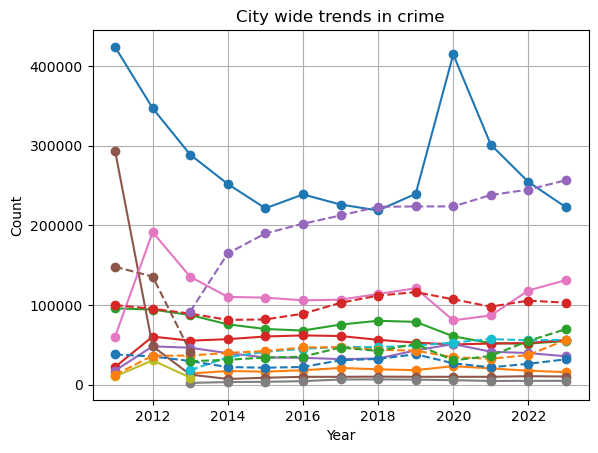

In [17]:
plot_crime(df_year_crimes) 

In [18]:
df_borough_crimes = df_london.groupby(['year', 'Crime type', 'Borough']).sum()[['count']] 
df_borough_crimes.reset_index(inplace=True) 

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\1471414705.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_borough_crimes = df_london.groupby(['year', 'Crime type', 'Borough']).sum()[['count']]


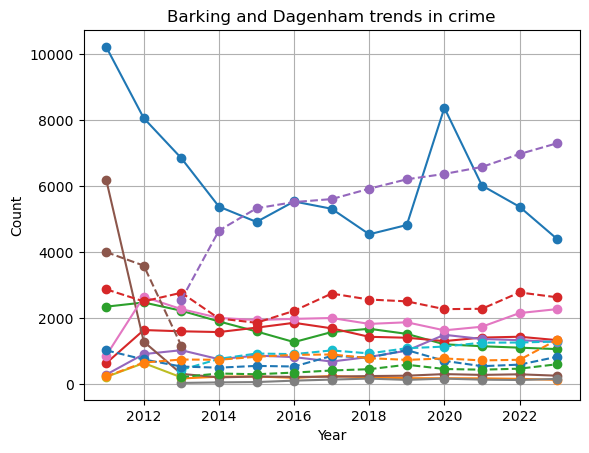

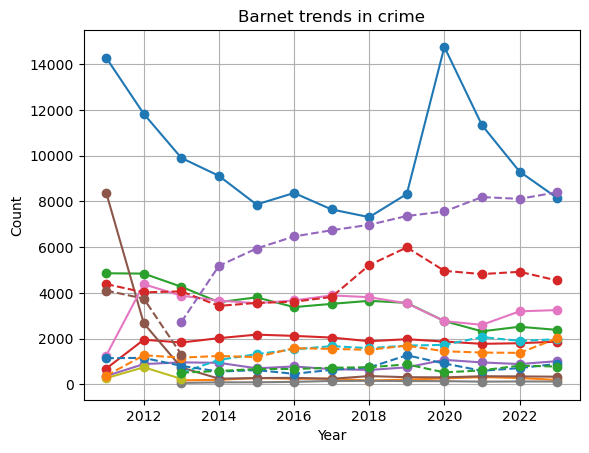

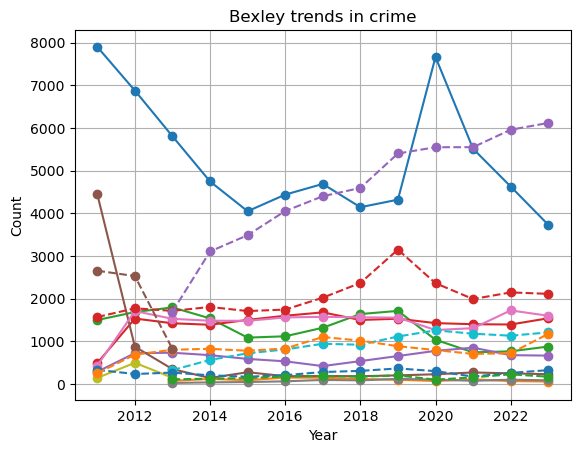

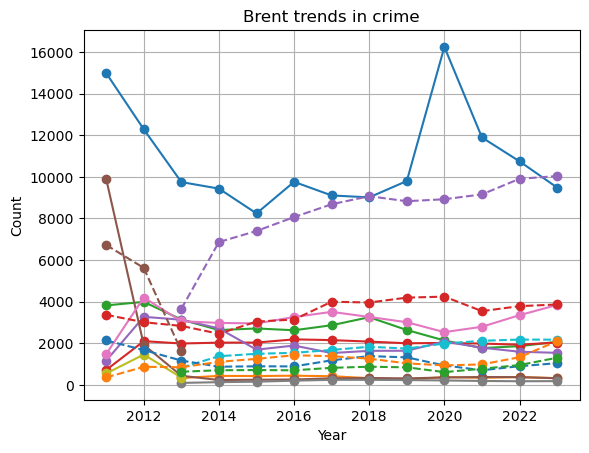

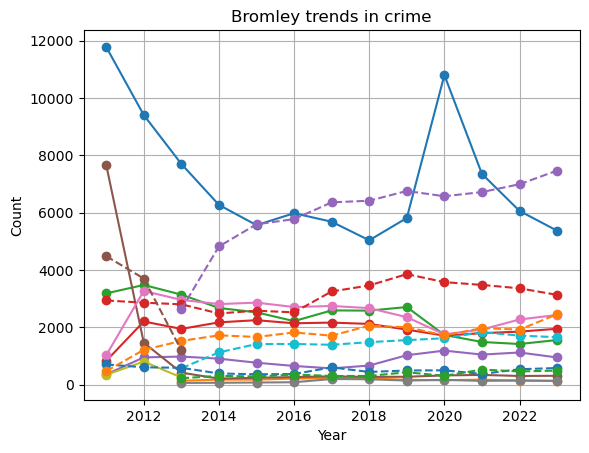

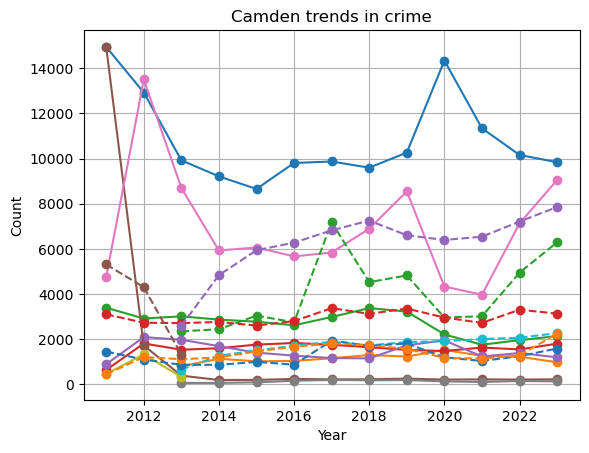

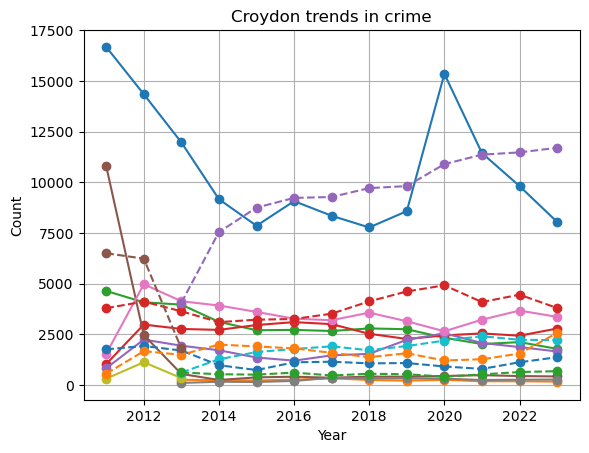

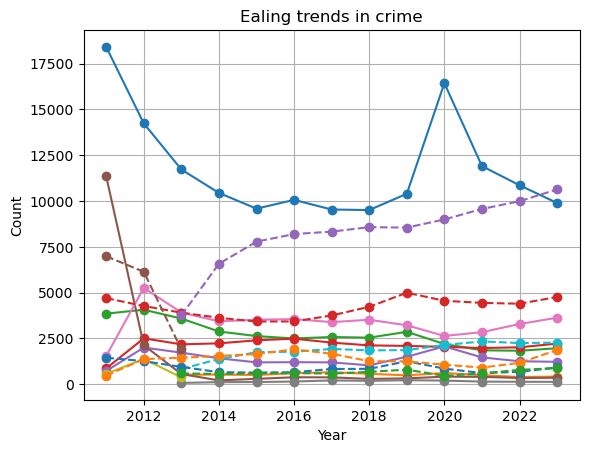

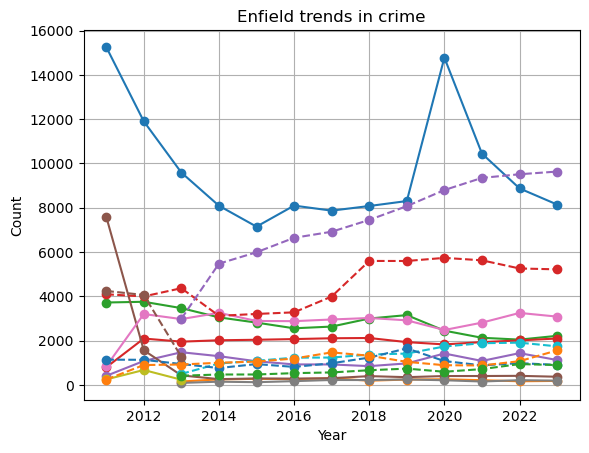

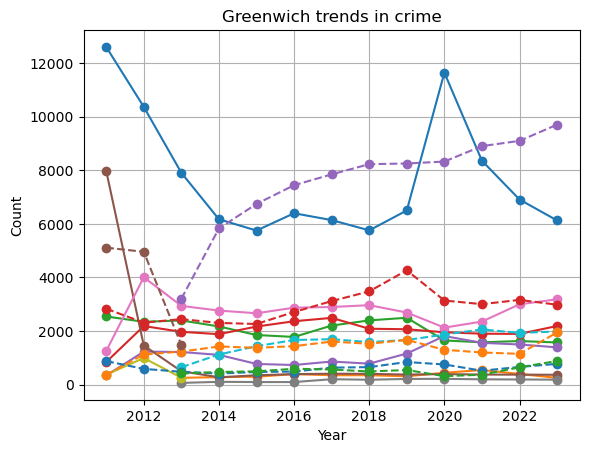

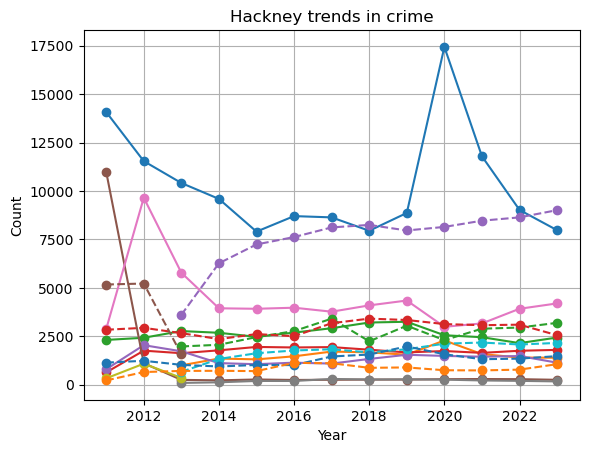

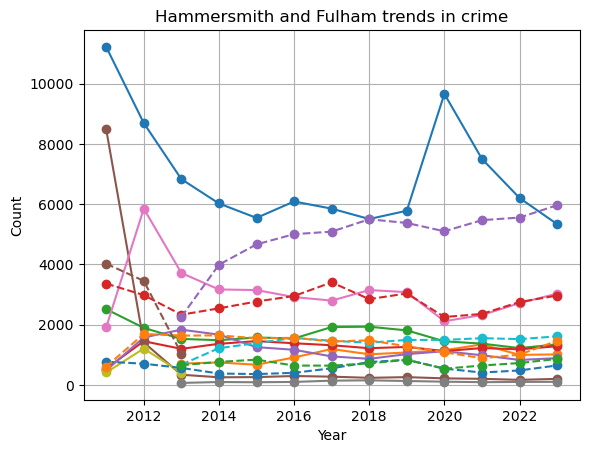

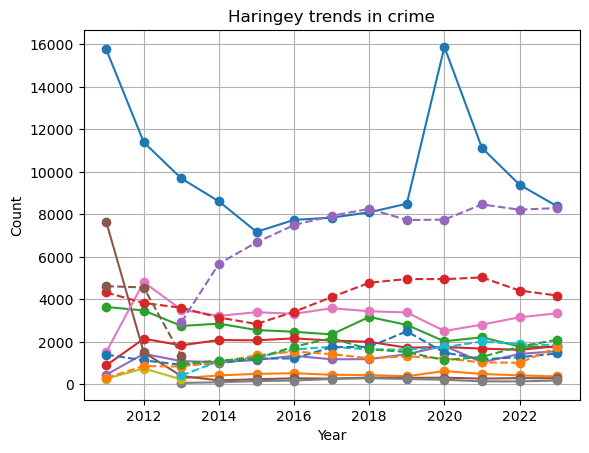

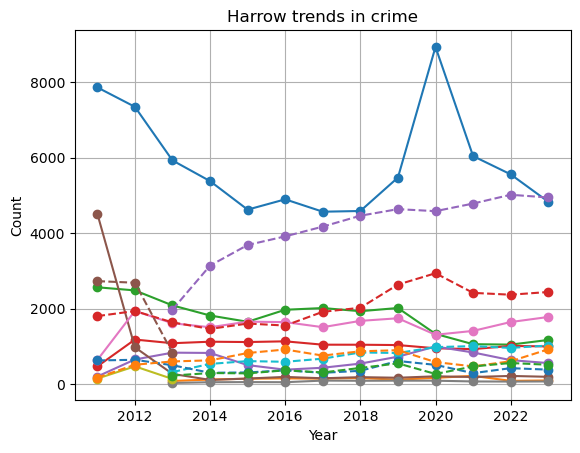

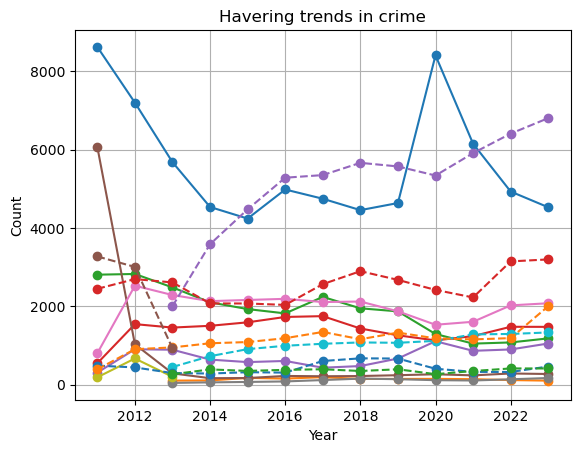

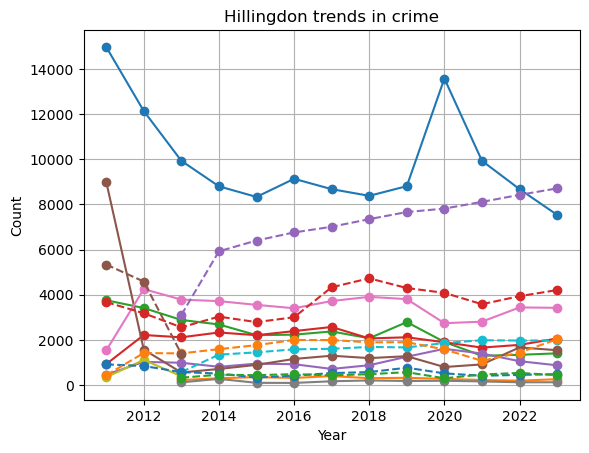

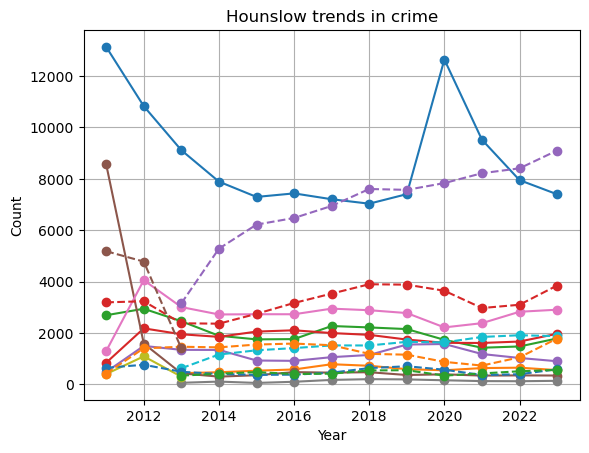

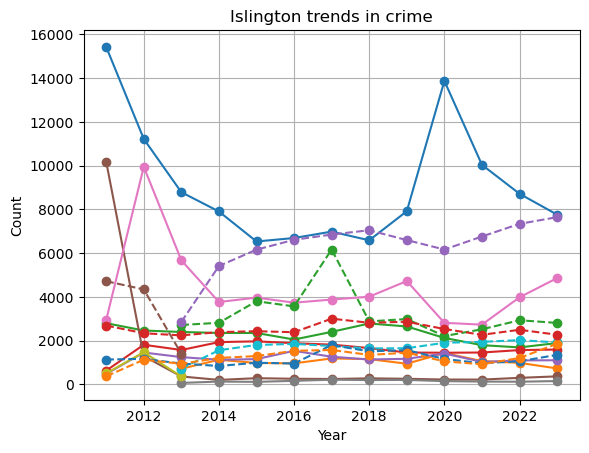

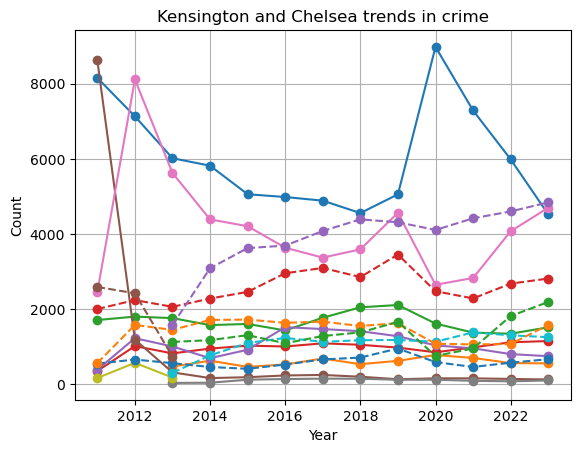

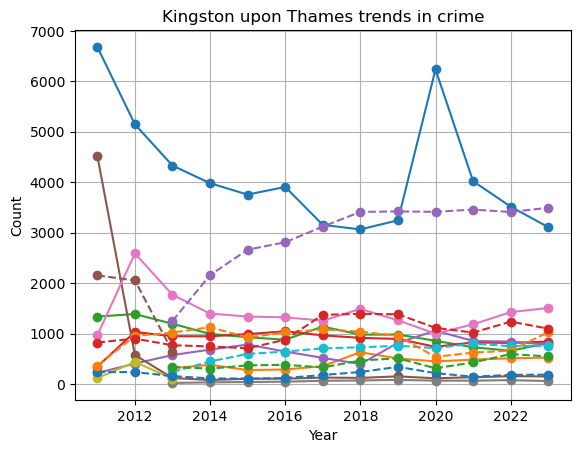

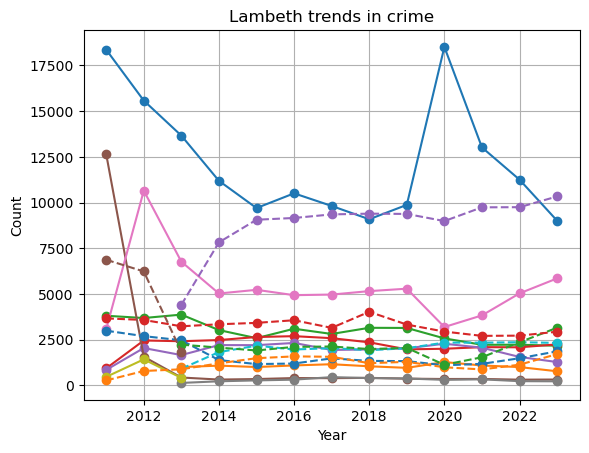

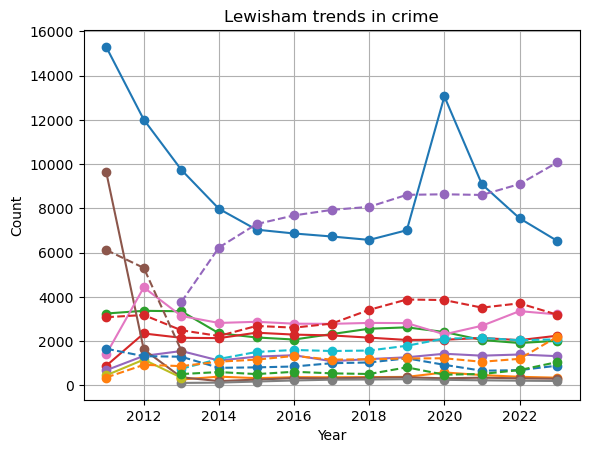

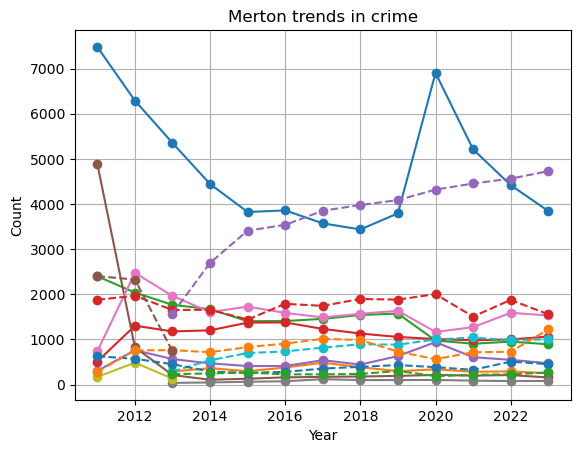

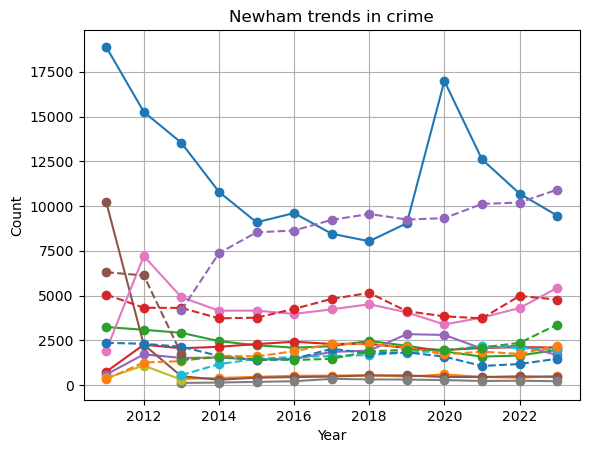

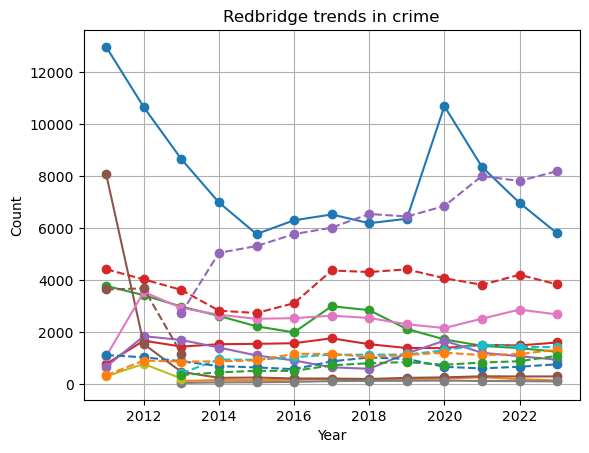

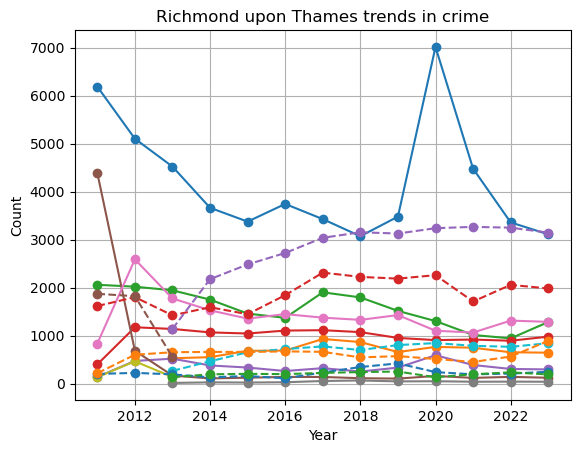

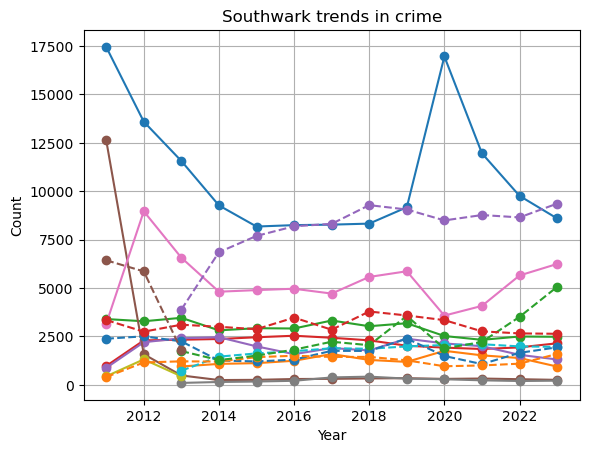

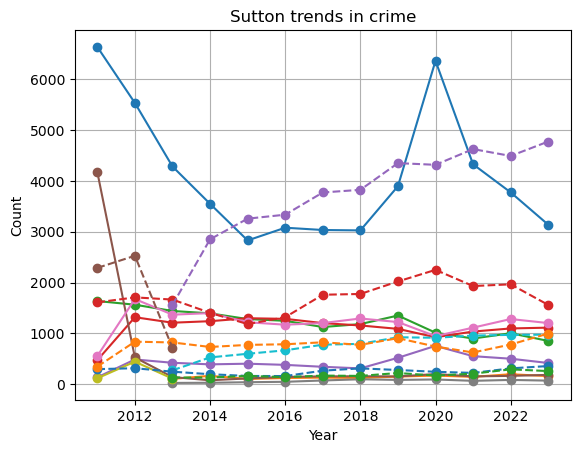

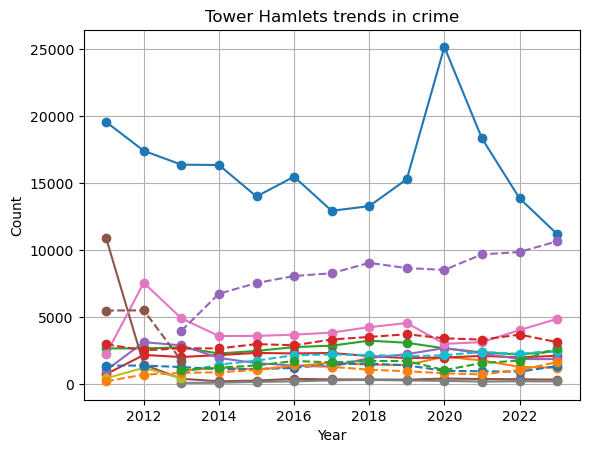

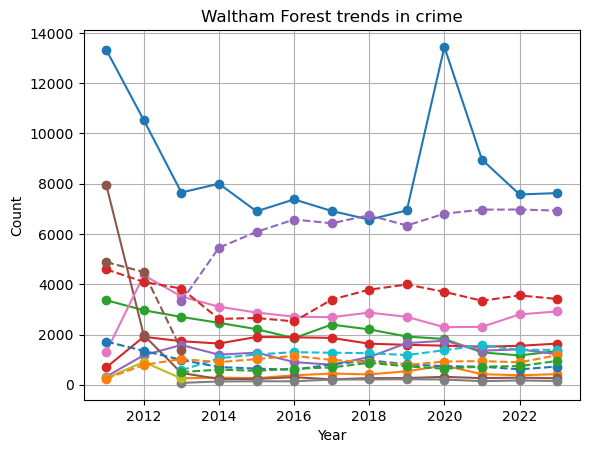

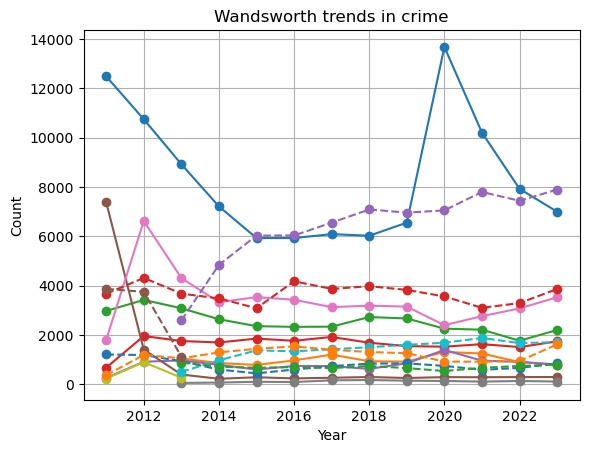

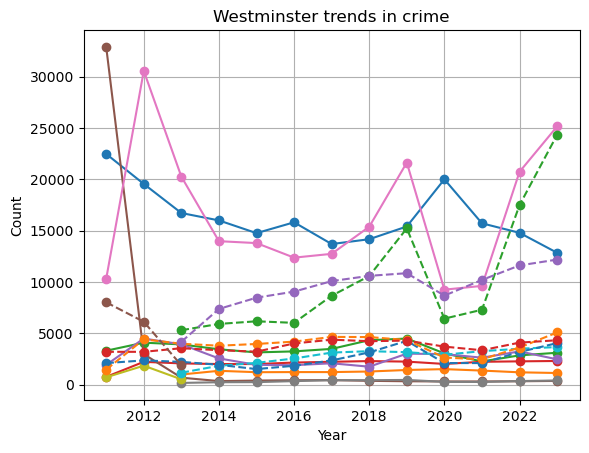

In [19]:
for B in boroughs: 
    plot_crime_bor(df_borough_crimes[df_borough_crimes['Borough'] == B], B)

In [30]:
# Gradient map 
df_year_crimes.set_index('Crime type')

year   count
Crime type                                
Anti-social behaviour         2011  424099
Burglary                      2011   95854
Criminal damage and arson     2011   22255
Drugs                         2011   17695
Other crime                   2011  293675
...                            ...     ...
Robbery                       2023   31846
Shoplifting                   2023   56402
Theft from the person         2023   69812
Vehicle crime                 2023  102955
Violence and sexual offences  2023  256830

[178 rows x 2 columns]

In [29]:
df_borough_crimes

year                    Crime type               Borough  count
0     2011         Anti-social behaviour  Barking and Dagenham  10214
1     2011         Anti-social behaviour                Barnet  14288
2     2011         Anti-social behaviour                Bexley   7897
3     2011         Anti-social behaviour                 Brent  14985
4     2011         Anti-social behaviour               Bromley  11783
...    ...                           ...                   ...    ...
5691  2023  Violence and sexual offences                Sutton   4773
5692  2023  Violence and sexual offences         Tower Hamlets  10648
5693  2023  Violence and sexual offences        Waltham Forest   6929
5694  2023  Violence and sexual offences            Wandsworth   7891
5695  2023  Violence and sexual offences           Westminster  12169

[5696 rows x 4 columns]

In [20]:
len(set(df_london['Location'].values)), len(df_london)

(38464, 13748819)

In [21]:
df_london.groupby(['Borough', 'year']).sum()[['count']]

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\3565272240.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_london.groupby(['Borough', 'year']).sum()[['count']]


count
Borough              year        
Barking and Dagenham 2011   28875
                     2012   25129
                     2013   23075
                     2014   21039
                     2015   21324
...                           ...
Westminster          2019   90956
                     2020   65660
                     2021   62873
                     2022   89065
                     2023  101216

[416 rows x 1 columns]

In [22]:
df_borough_crimes

year                    Crime type               Borough  count
0     2011         Anti-social behaviour  Barking and Dagenham  10214
1     2011         Anti-social behaviour                Barnet  14288
2     2011         Anti-social behaviour                Bexley   7897
3     2011         Anti-social behaviour                 Brent  14985
4     2011         Anti-social behaviour               Bromley  11783
...    ...                           ...                   ...    ...
5691  2023  Violence and sexual offences                Sutton   4773
5692  2023  Violence and sexual offences         Tower Hamlets  10648
5693  2023  Violence and sexual offences        Waltham Forest   6929
5694  2023  Violence and sexual offences            Wandsworth   7891
5695  2023  Violence and sexual offences           Westminster  12169

[5696 rows x 4 columns]

In [23]:
def summarize_top_crimes(df):
    # Group the DataFrame by 'YEAR', 'NEIGHBOURHOOD', and 'CRIMETYPE', then sum the 'FREQUENCY'
    summary_df = df.groupby(['year', 'Borough', 'Crime type'])['count'].sum().reset_index()

    # Find the top crime for each neighbourhood per year
    top_crimes = summary_df.groupby(['year', 'Borough']).apply(lambda x: x.nlargest(1, 'count'))

    return top_crimes

In [24]:
borough_top_crime = summarize_top_crimes(df_borough_crimes)

In [25]:
borough_top_crime

year               Borough  \
year Borough                                                 
2011 Barking and Dagenham 0     2011  Barking and Dagenham   
     Barnet               11    2011                Barnet   
     Bexley               22    2011                Bexley   
     Brent                33    2011                 Brent   
     Bromley              44    2011               Bromley   
...                              ...                   ...   
2023 Sutton               5639  2023                Sutton   
     Tower Hamlets        5640  2023         Tower Hamlets   
     Waltham Forest       5654  2023        Waltham Forest   
     Wandsworth           5681  2023            Wandsworth   
     Westminster          5688  2023           Westminster   

                                                  Crime type  count  
year Borough                                                         
2011 Barking and Dagenham 0            Anti-social behaviour  10214  
     Barnet               11           Anti-social behaviour  14288  
     Bexley               22           Anti-social behaviour   7897  
     Brent                33           Anti-social behaviour  14985  
     Bromley              44           Anti-social behaviour  11783  
...                                                      ...    ...  
2023 Sutton               5639  Violence and sexual offences   4773  
     Tower Hamlets        5640         Anti-social behaviour  11190  
     Waltham Forest       5654         Anti-social behaviour   7625  
     Wandsworth           5681  Violence and sexual offences   7891  
     Westminster          5688                   Other theft  25136  

[416 rows x 4 columns]

In [26]:
df_year_crimetype = df_london.groupby(['Crime type', 'year']).sum()[['count']]  
df_year_crimetype['direction'] = df_year_crimetype['count'].shift(1) 
df_year_crimetype['direction'] = df_year_crimetype['count'] - df_year_crimetype['direction']  
df_year_crimetype['direction'] = [1 if x > 0 else -1 if x < 0 else 0 for x in df_year_crimetype['direction'].values] 
df_year_crimetype.reset_index(inplace=True) 

similarity = np.zeros((16, 16))

counter1 = 0
for crime in crimes: 
    df_crime1 = df_year_crimetype[df_year_crimetype['Crime type'] == crime] 
    crimes.remove(crime) 
    counter2 =0
    for crime in crimes: 
        df_crime2 = df_year_crimetype[df_year_crimetype['Crime type'] == crime] 
        direction_match = (df_crime1.set_index('year')['direction'] == df_crime2.set_index('year')['direction']).sum().sum()   
        similarity[counter1, counter2] = direction_match 
        counter2 +=1 
    counter1+=1

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\2868336863.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_year_crimetype = df_london.groupby(['Crime type', 'year']).sum()[['count']]


ValueError: Can only compare identically-labeled Series objects

In [ ]:
df_crime_borough = df_london.groupby(['Borough', 'Crime type', 'year']).sum()[['count']]

In [ ]:
df_borough_crime = df_crime_borough.reset_index().set_index(['Borough']) 

In [ ]:
print(len(crimes))  
np.zeros((16, 16))

In [ ]:
df_borough_crime['direction'] = df_borough_crime['count'].shift(1) 
df_borough_crime['direction'] = df_borough_crime['count'] - df_borough_crime['direction']  
df_borough_crime['direction'] = [1 if x > 0 else -1 if x < 0 else 0 for x in df_borough_crime['direction'].values] 

#### Trust EDA

In [55]:
df_pas = pd.read_json('PAS.json')

In [56]:
df_pas

Date Survey               Borough           Measure  Proportion  \
0       2023-12-31    PAS  Barking and Dagenham  "Good Job" local        0.48   
1       2023-12-31    PAS                Barnet  "Good Job" local        0.47   
2       2023-12-31    PAS                Bexley  "Good Job" local        0.54   
3       2023-12-31    PAS                 Brent  "Good Job" local        0.49   
4       2023-12-31    PAS               Bromley  "Good Job" local        0.51   
...            ...    ...                   ...               ...         ...   
1048360        NaT   None                  None              None         NaN   
1048361        NaT   None                  None              None         NaN   
1048362        NaT   None                  None              None         NaN   
1048363        NaT   None                  None              None         NaN   
1048364        NaT   None                  None              None         NaN   

          MPS  
0        0.47  
1        0.47  
2        0.47  
3        0.47  
4        0.47  
...       ...  
1048360   NaN  
1048361   NaN  
1048362   NaN  
1048363   NaN  
1048364   NaN  

[1048365 rows x 6 columns]

In [57]:
df_pas_clean = df_pas[df_pas['Date'].notnull()]

In [58]:
df_pas_clean2 = df_pas[df_pas['Proportion'].notnull()]

In [59]:
def pas_year(date):  
    year = date.year
    return year 

def pas_month(date): 
    month = date.month 
    return month

In [60]:
df_pas_clean['year'] = df_pas['Date'].apply(pas_year)
df_pas_clean['month'] = df_pas['Date'].apply(pas_month)

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\3283670848.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pas_clean['year'] = df_pas['Date'].apply(pas_year)
C:\Users\diego\AppData\Local\Temp\ipykernel_25432\3283670848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_pas_clean['month'] = df_pas['Date'].apply(pas_month)


In [61]:
set(df_pas_clean['month'])

{3.0, 6.0, 9.0, 12.0}

In [62]:
# they get asked at the end of the month 
# difference in analysis between recent event impact and previous 3 months impact 

In [63]:
df_pas_clean.groupby(['Borough', 'Measure', 'year', 'month']).agg({'Proportion':['mean', 'count'], 'MPS': ['mean', 'count']})

Proportion         MPS  \
                                                          mean count  mean   
Borough              Measure           year   month                          
Barking and Dagenham "Good Job" local  2014.0 12.0        0.56     1  0.67   
                                       2015.0 3.0         0.57     1  0.67   
                                              6.0         0.61     1  0.66   
                                              9.0         0.61     1  0.67   
                                              12.0        0.66     1  0.67   
...                                                        ...   ...   ...   
Wandsworth           Understand issues 2022.0 12.0        0.54     1  0.58   
                                       2023.0 3.0         0.58     1  0.59   
                                              6.0         0.56     1  0.57   
                                              9.0         0.55     1  0.57   
                                              12.0        0.56     1  0.57   

                                                           
                                                    count  
Borough              Measure           year   month        
Barking and Dagenham "Good Job" local  2014.0 12.0      1  
                                       2015.0 3.0       1  
                                              6.0       1  
                                              9.0       1  
                                              12.0      1  
...                                                   ...  
Wandsworth           Understand issues 2022.0 12.0      1  
                                       2023.0 3.0       1  
                                              6.0       1  
                                              9.0       1  
                                              12.0      1  

[9312 rows x 4 columns]

In [64]:
year_boroughs = list(df_pas_clean.groupby(['year', 'Borough']).mean().index)

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\2472144175.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_boroughs = list(df_pas_clean.groupby(['year', 'Borough']).mean().index)


In [65]:
sorted_year_boroughs = sorted(year_boroughs, key=lambda x: x[1]) 
years_covered = dict() 
for elem in sorted_year_boroughs: 
    if elem[1] not in years_covered: 
        years_covered[elem[1]] = 1 
    else: 
        years_covered[elem[1]] += 1
years_covered

{'Barking and Dagenham': 10,
 'Barnet': 10,
 'Bexley': 10,
 'Brent': 10,
 'Bromley': 10,
 'Camden': 10,
 'City of Westminster': 10,
 'Croydon': 10,
 'Ealing': 10,
 'Enfield': 10,
 'Greenwich': 10,
 'Hackney': 10,
 'Hammersmith and Fulham': 10,
 'Haringey': 10,
 'Harrow': 10,
 'Havering': 10,
 'Hillingdon': 10,
 'Hounslow': 10,
 'Islington': 10,
 'Kensington and Chelsea': 10,
 'Kingston upon Thames': 10,
 'Lambeth': 10,
 'Lewisham': 10,
 'Merton': 10,
 'Newham': 10,
 'Redbridge': 10,
 'Richmond upon Thames': 10,
 'Southwark': 10,
 'Sutton': 10,
 'Tower Hamlets': 10,
 'Waltham Forest': 10,
 'Wandsworth': 10}

In [66]:
df_pas['year'] = df_pas['Date'].dt.year

In [69]:
df_pas

Date Survey               Borough           Measure  Proportion  \
0       2023-12-31    PAS  Barking and Dagenham  "Good Job" local        0.48   
1       2023-12-31    PAS                Barnet  "Good Job" local        0.47   
2       2023-12-31    PAS                Bexley  "Good Job" local        0.54   
3       2023-12-31    PAS                 Brent  "Good Job" local        0.49   
4       2023-12-31    PAS               Bromley  "Good Job" local        0.51   
...            ...    ...                   ...               ...         ...   
1048360        NaT   None                  None              None         NaN   
1048361        NaT   None                  None              None         NaN   
1048362        NaT   None                  None              None         NaN   
1048363        NaT   None                  None              None         NaN   
1048364        NaT   None                  None              None         NaN   

          MPS    year  
0        0.47  2023.0  
1        0.47  2023.0  
2        0.47  2023.0  
3        0.47  2023.0  
4        0.47  2023.0  
...       ...     ...  
1048360   NaN     NaN  
1048361   NaN     NaN  
1048362   NaN     NaN  
1048363   NaN     NaN  
1048364   NaN     NaN  

[1048365 rows x 7 columns]

In [73]:
df_pas_yearly = df_pas.groupby(['Borough', 'year']).mean()

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\1829817688.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pas_yearly = df_pas.groupby(['Borough', 'year']).mean()


In [79]:
df_pas_yearly.reset_index(inplace=True)

In [93]:
df_pas_yearly.head(20)

Borough    year  Proportion       MPS
0   Barking and Dagenham  2014.0    0.580000  0.648571
1   Barking and Dagenham  2015.0    0.601786  0.642143
2   Barking and Dagenham  2016.0    0.677500  0.667813
3   Barking and Dagenham  2017.0    0.695000  0.665000
4   Barking and Dagenham  2018.0    0.607187  0.614375
5   Barking and Dagenham  2019.0    0.565312  0.588125
6   Barking and Dagenham  2020.0    0.591562  0.591562
7   Barking and Dagenham  2021.0    0.561250  0.571562
8   Barking and Dagenham  2022.0    0.554375  0.522500
9   Barking and Dagenham  2023.0    0.509375  0.499063
10                Barnet  2014.0    0.637143  0.648571
11                Barnet  2015.0    0.623571  0.642143
12                Barnet  2016.0    0.660937  0.667813
13                Barnet  2017.0    0.673125  0.665000
14                Barnet  2018.0    0.646563  0.614375
15                Barnet  2019.0    0.629688  0.588125
16                Barnet  2020.0    0.637500  0.591562
17                Barnet  2021.0    0.574688  0.571562
18                Barnet  2022.0    0.537500  0.522500
19                Barnet  2023.0    0.515625  0.499063

In [94]:
def plot_trust_bor(group, borough): 
    
    plt.plot(group['year'], group['Proportion'], marker='o')  

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Trust')
    plt.title('{} trends in trust'.format(borough))
    #plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show() 

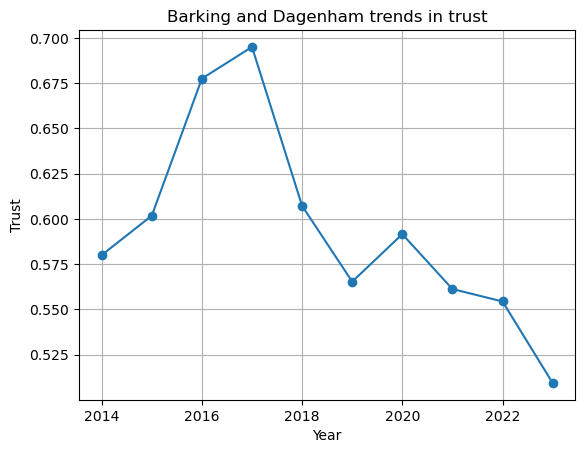

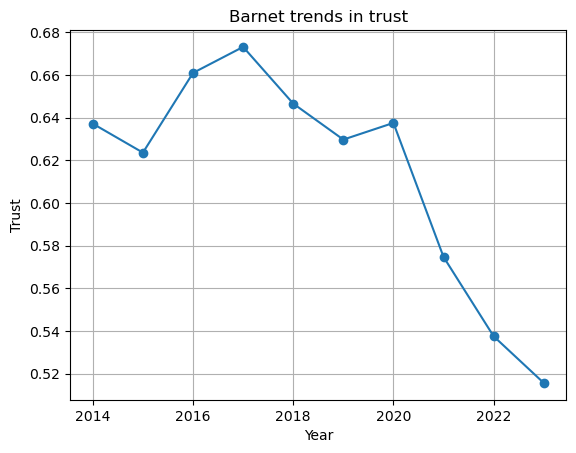

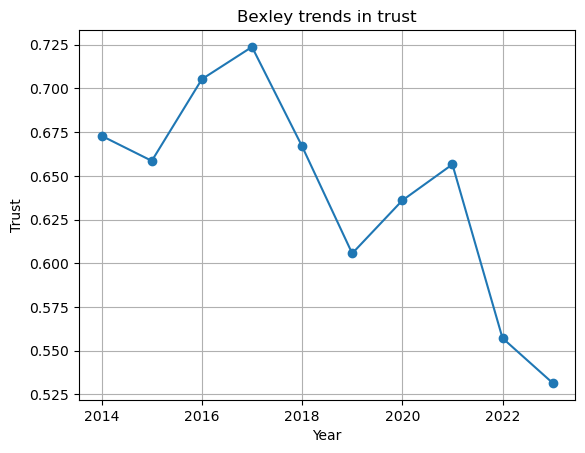

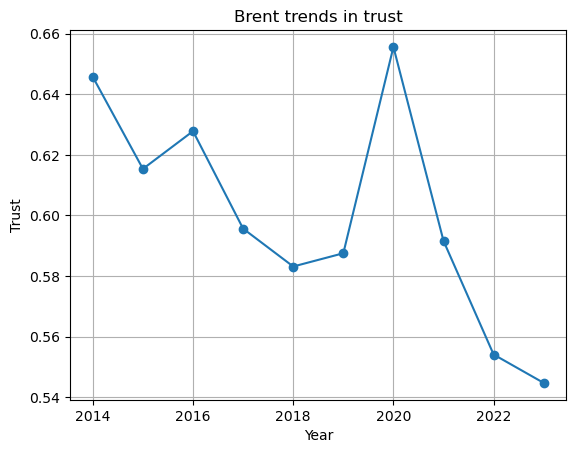

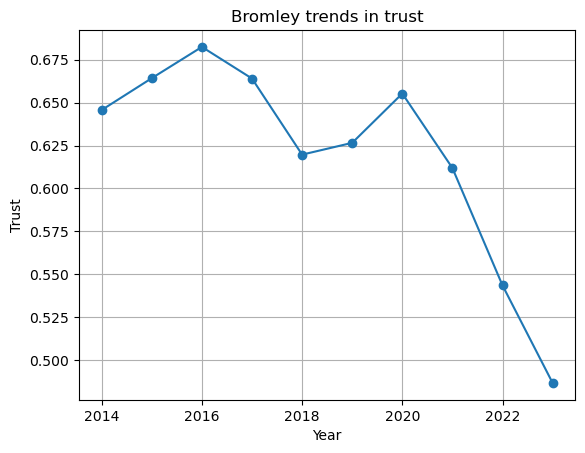

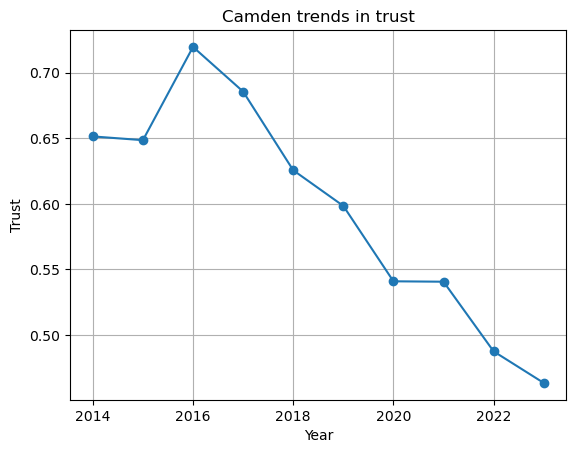

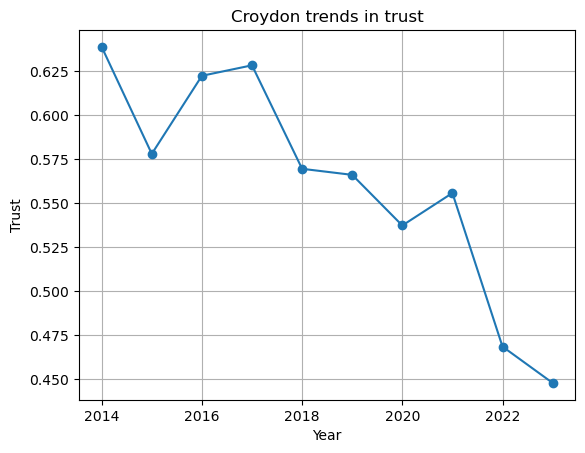

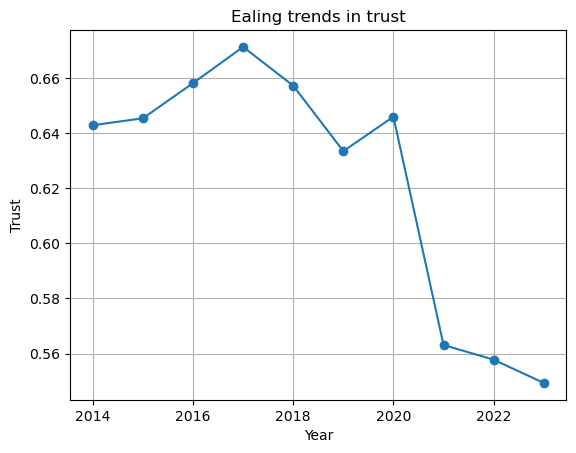

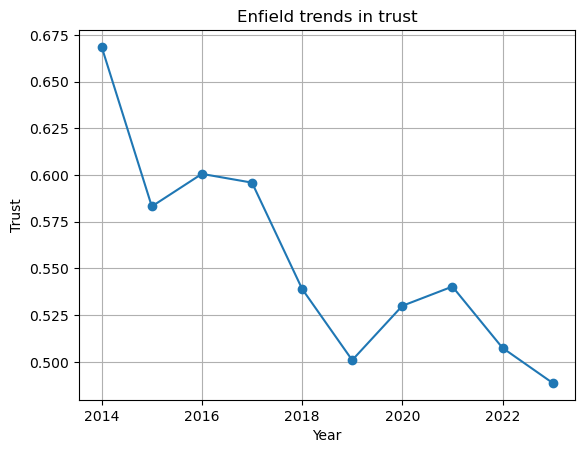

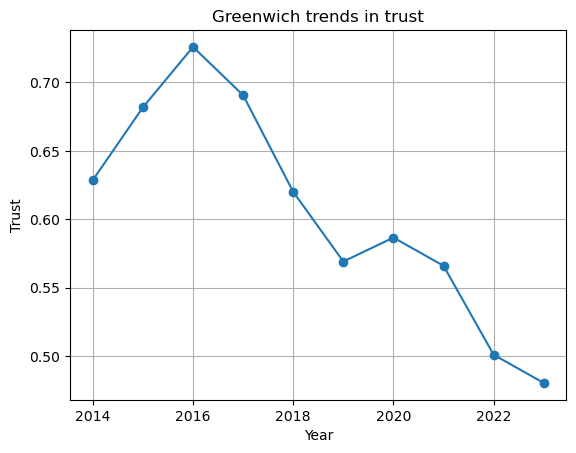

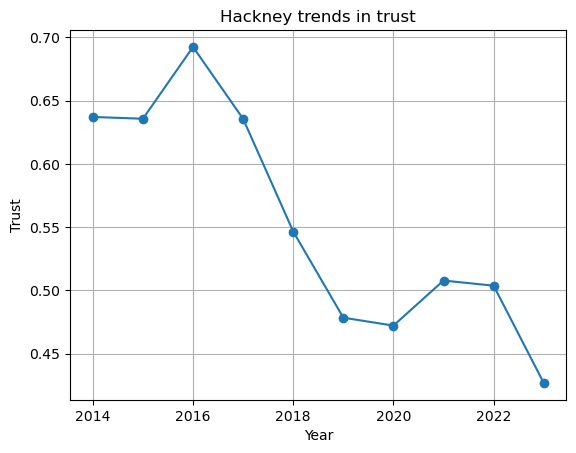

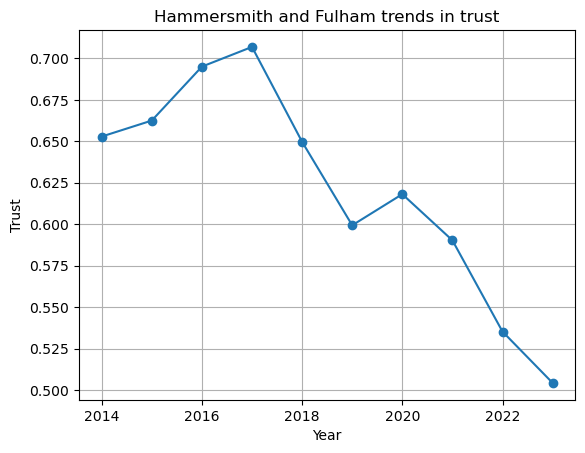

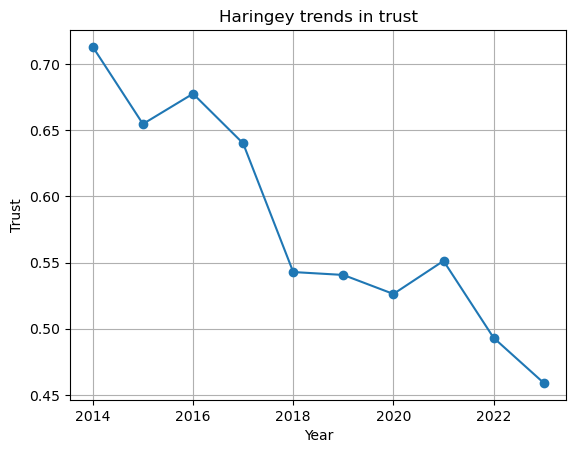

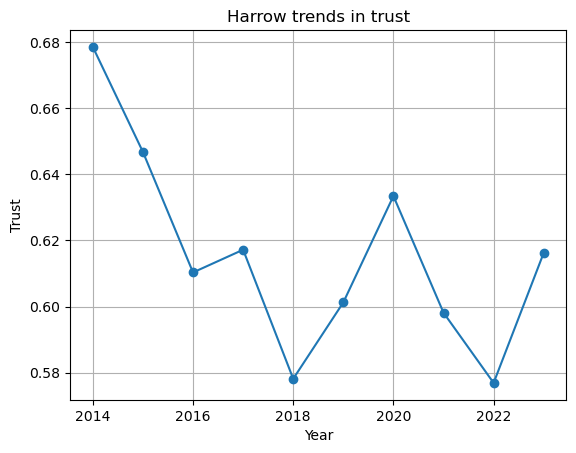

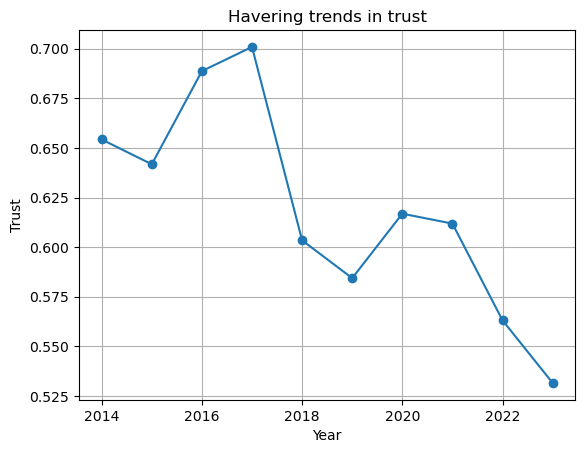

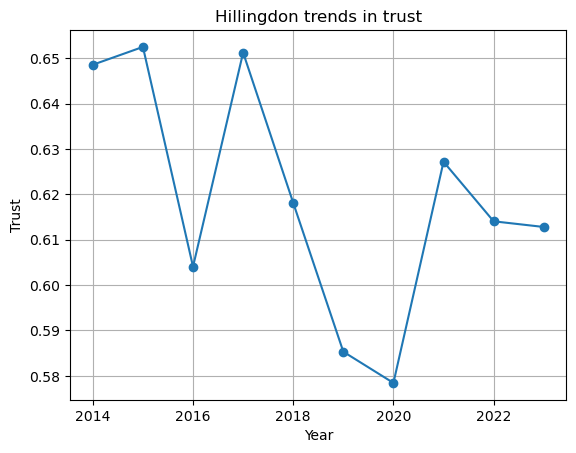

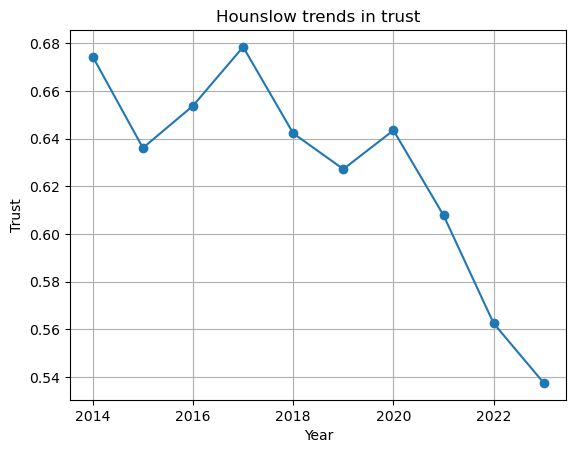

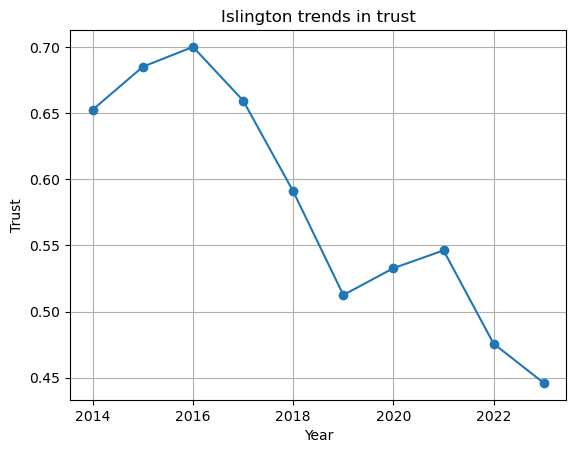

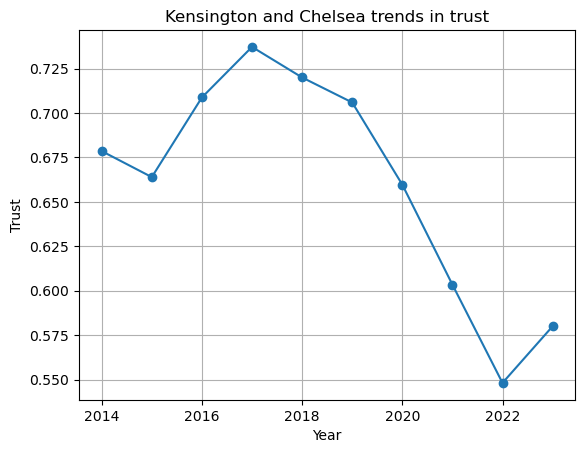

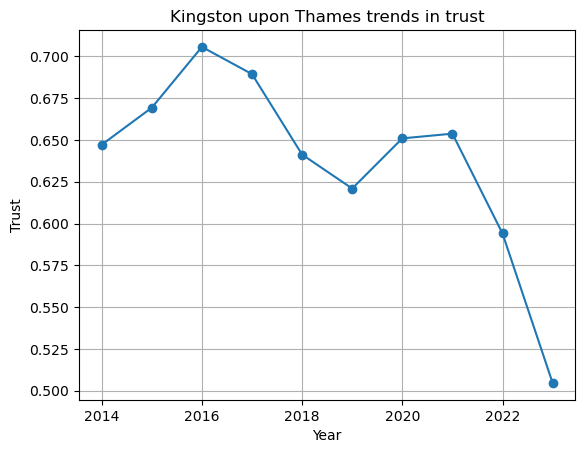

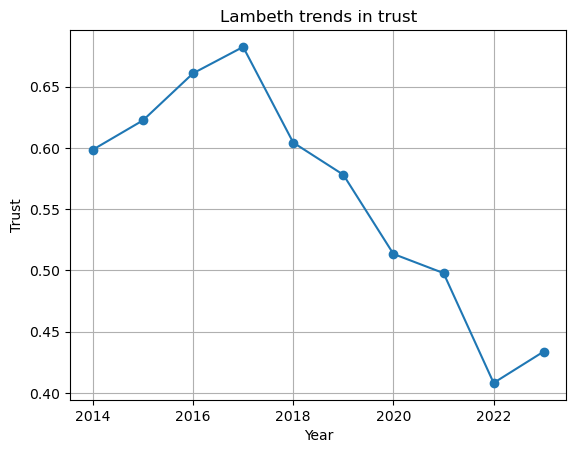

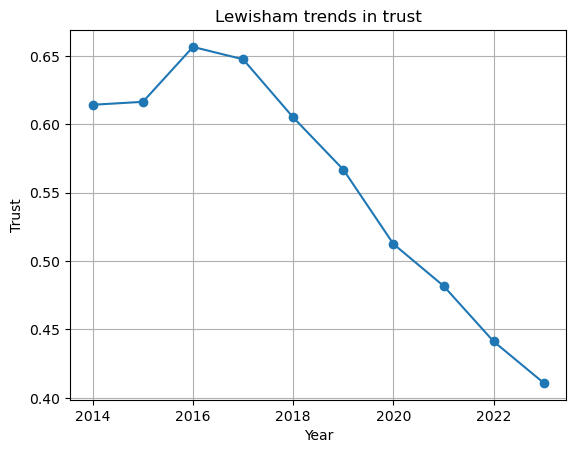

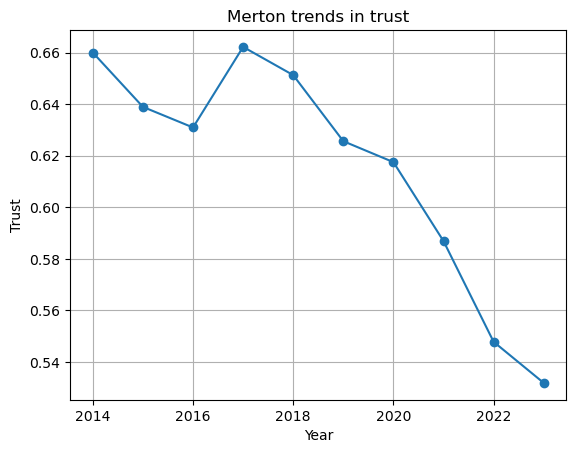

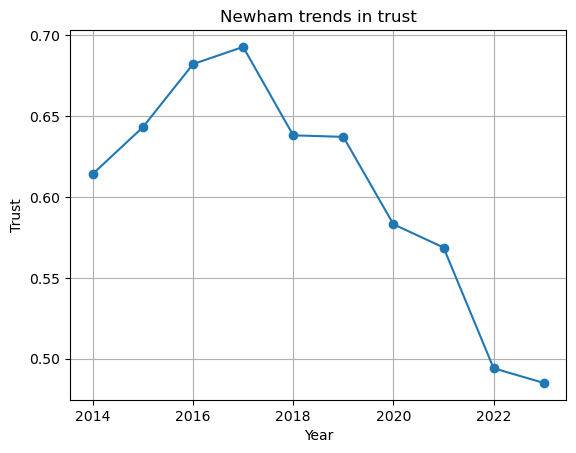

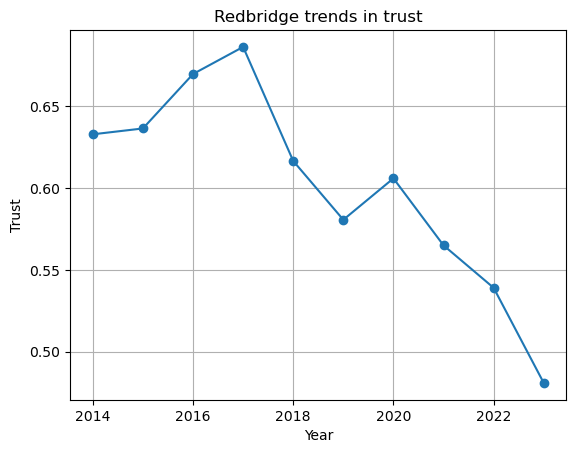

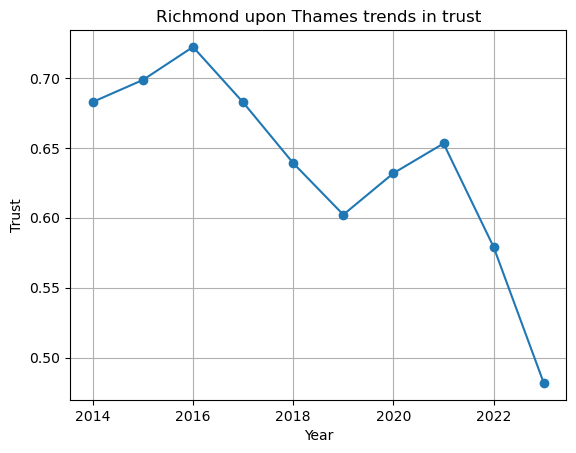

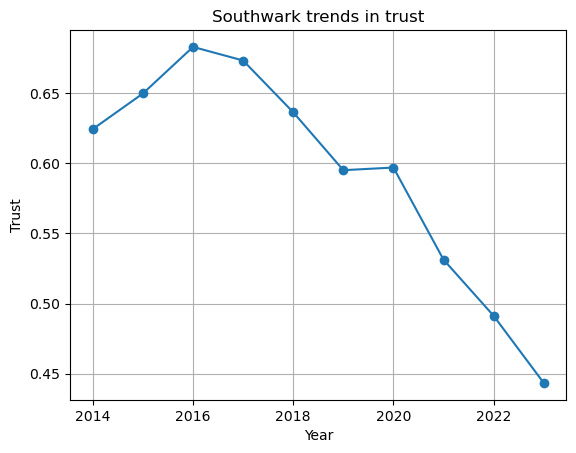

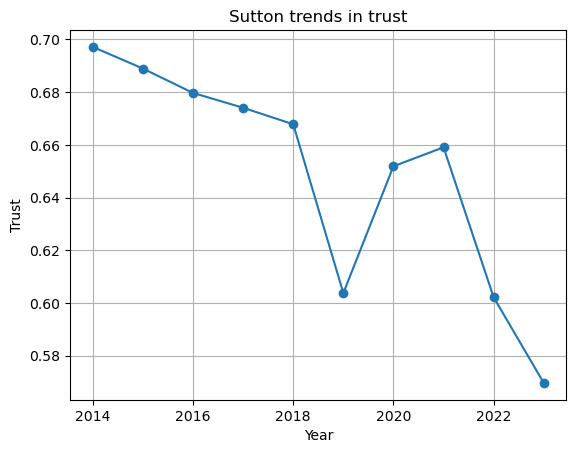

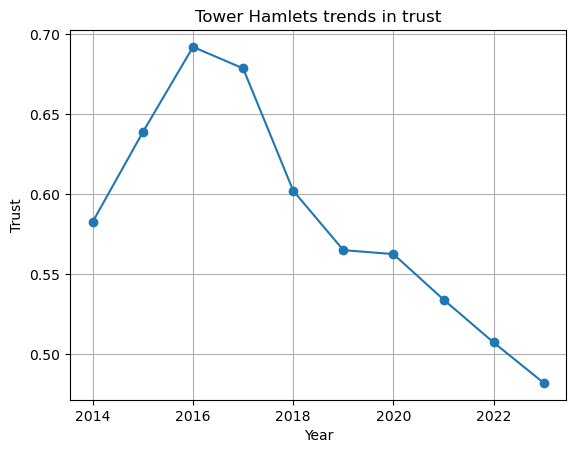

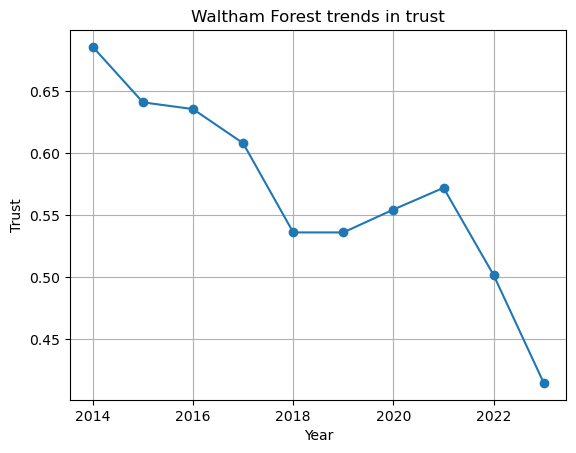

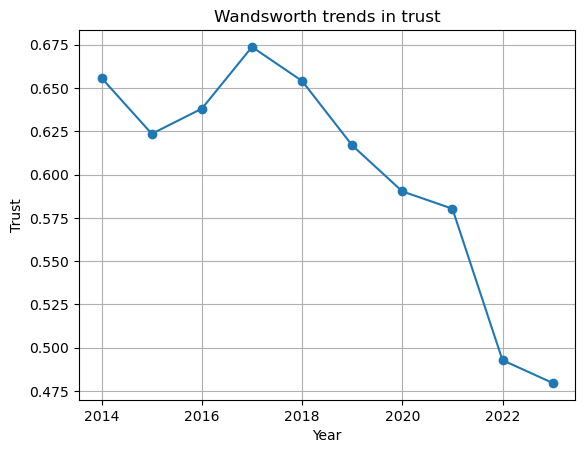

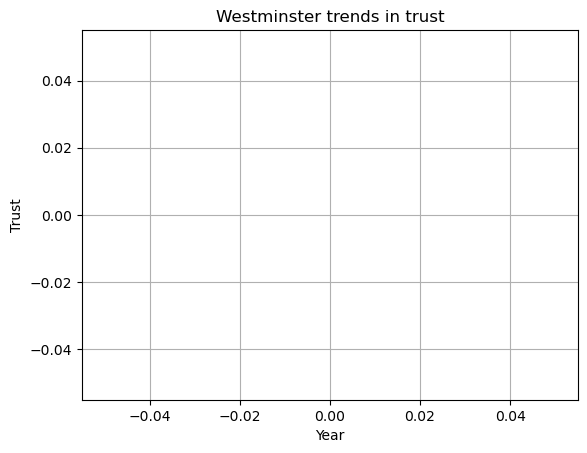

In [95]:
for B in boroughs: 
    plot_trust_bor(df_pas_yearly[df_pas_yearly['Borough'] == B], B)

In [99]:
df_pas_date = df_pas.groupby(['Borough', 'Date']).mean()

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\3282306687.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_pas_date = df_pas.groupby(['Borough', 'Date']).mean()


In [107]:
df_pas_date.head()

Borough       Date  Proportion       MPS    year
0  Barking and Dagenham 2014-12-31    0.580000  0.648571  2014.0
1  Barking and Dagenham 2015-03-31    0.588571  0.650000  2015.0
2  Barking and Dagenham 2015-06-30    0.597143  0.645714  2015.0
3  Barking and Dagenham 2015-09-30    0.605714  0.638571  2015.0
4  Barking and Dagenham 2015-12-31    0.615714  0.634286  2015.0

In [103]:
def plot_trust_bor(group, borough): 
    
    plt.plot(group['Date'], group['Proportion'], marker='o')  

    # Add labels and title
    plt.xlabel('Year')
    plt.ylabel('Trust')
    plt.title('{} trends in trust'.format(borough))
    #plt.legend()

    # Show the plot
    plt.grid(True)
    plt.show() 

In [105]:
df_pas_date.reset_index(inplace=True)

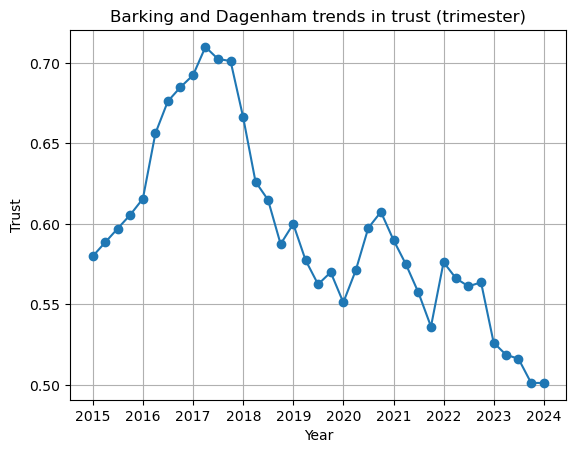

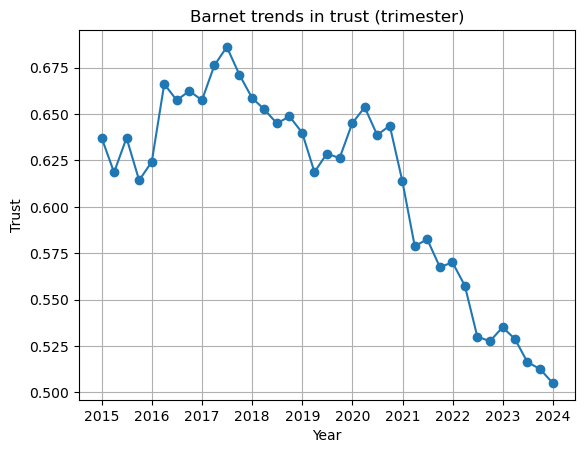

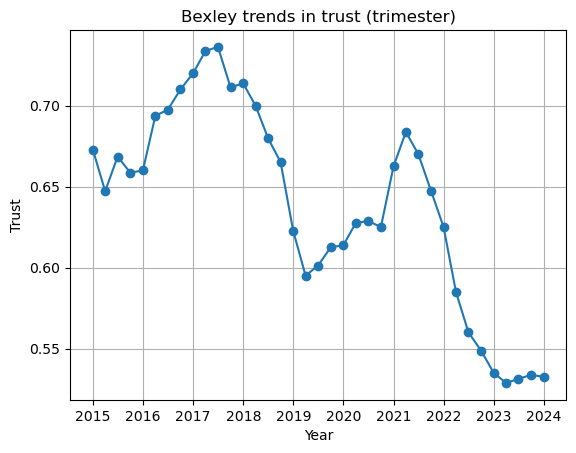

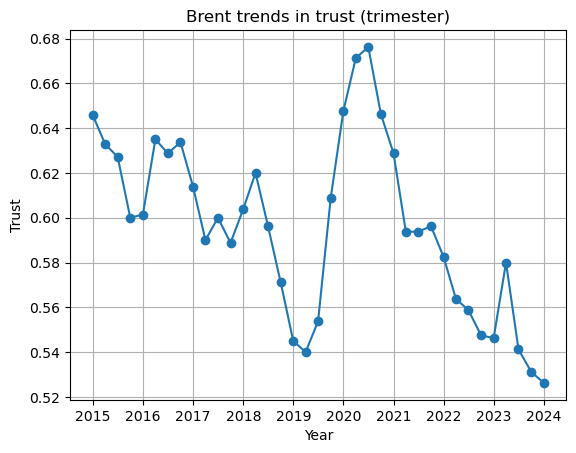

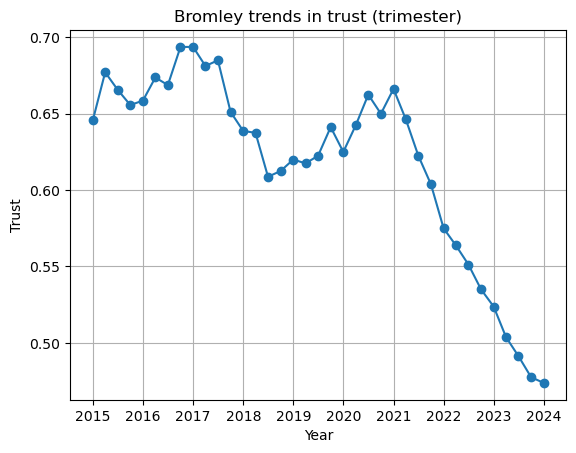

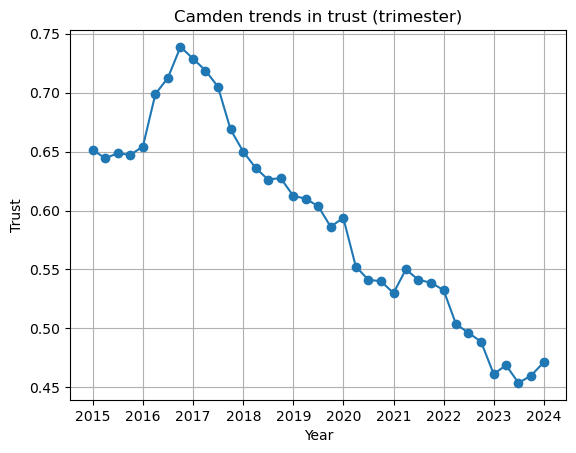

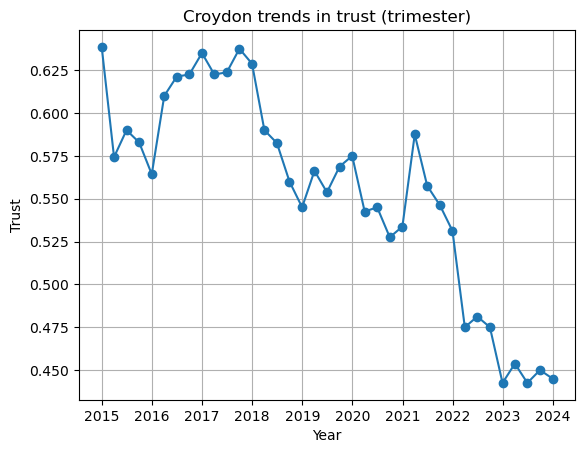

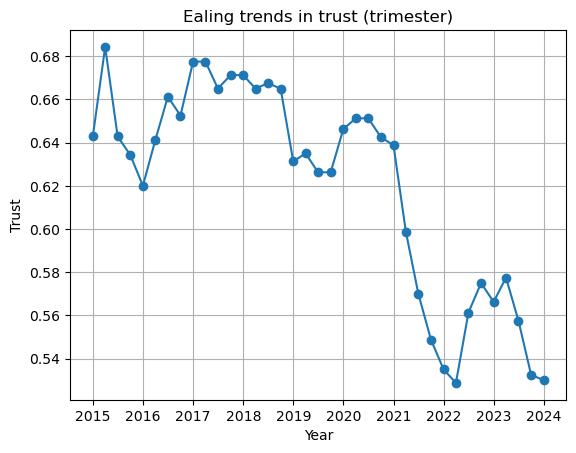

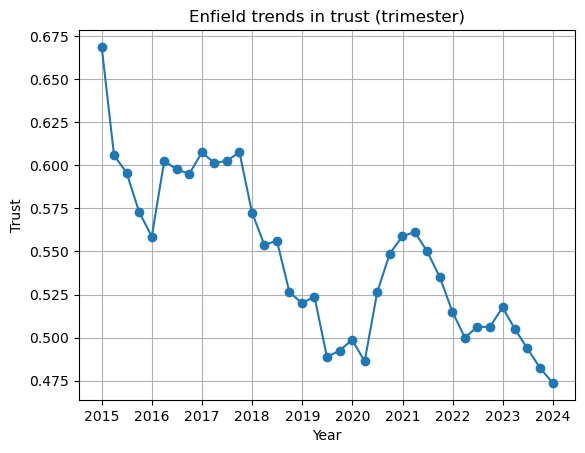

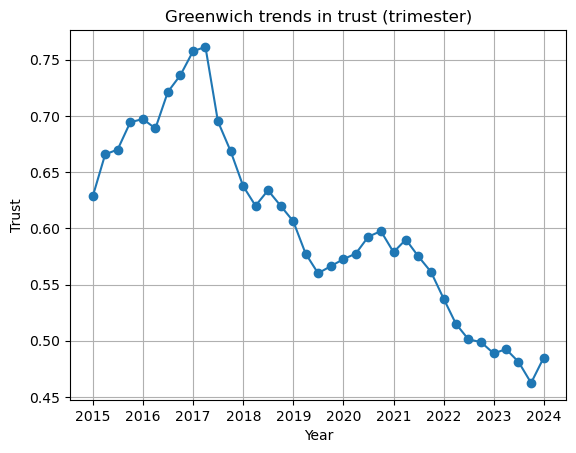

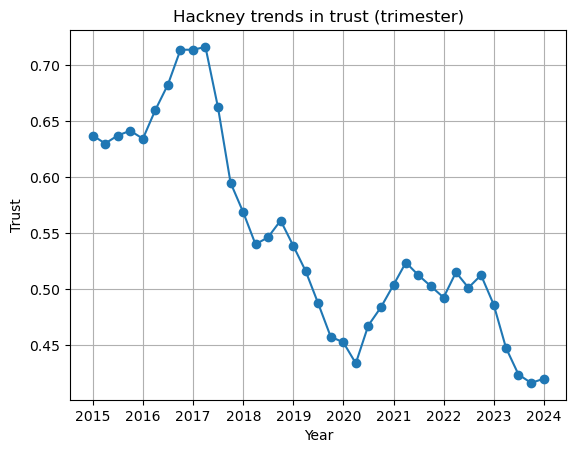

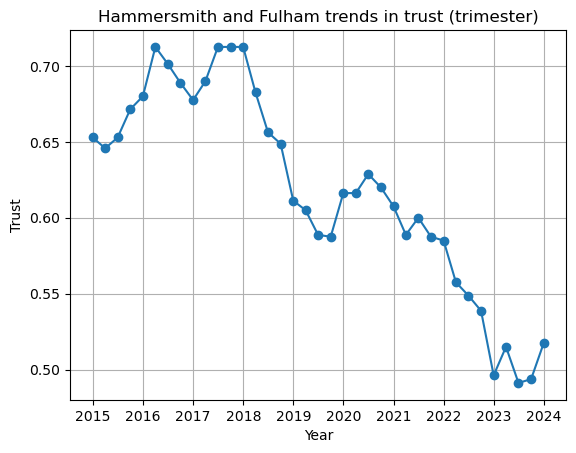

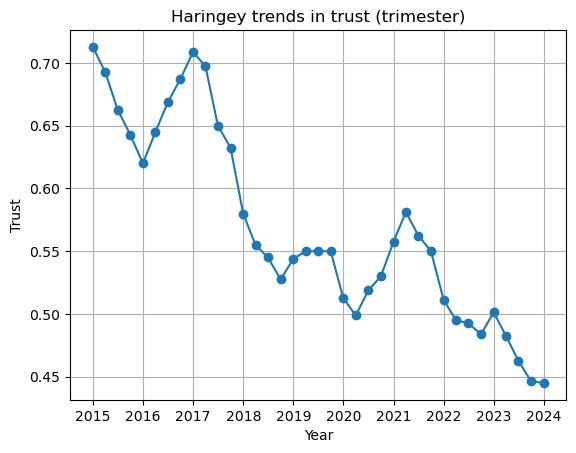

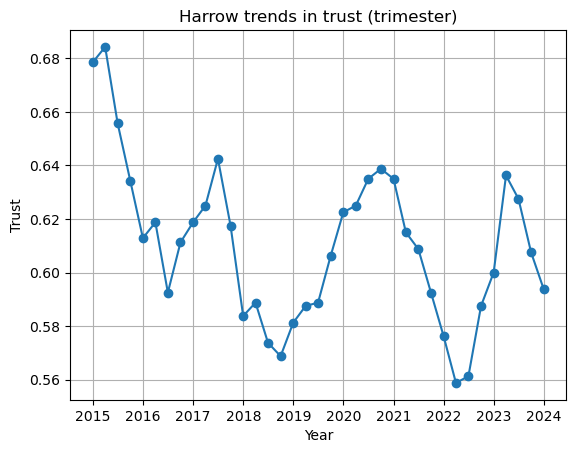

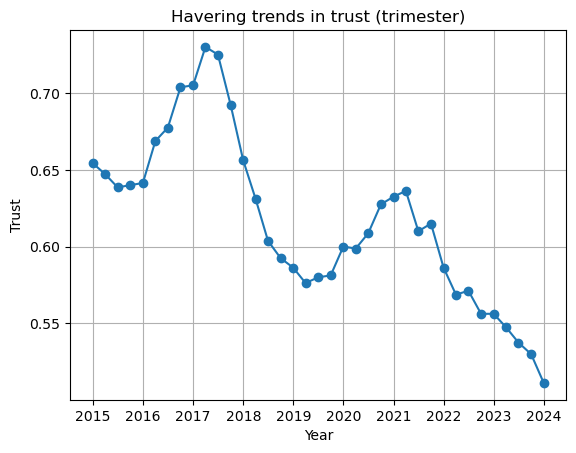

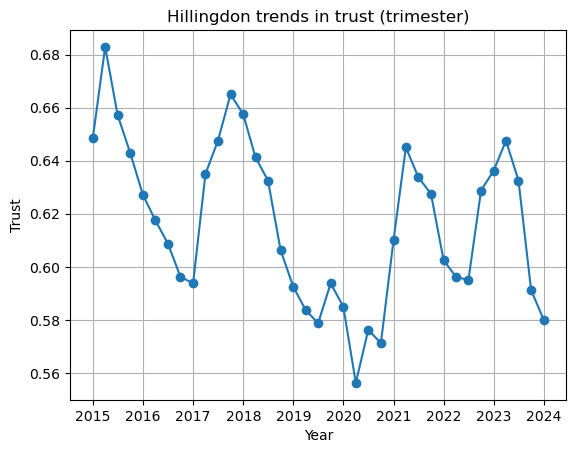

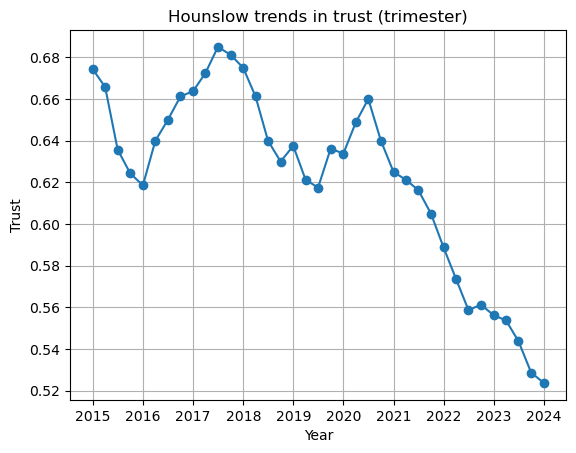

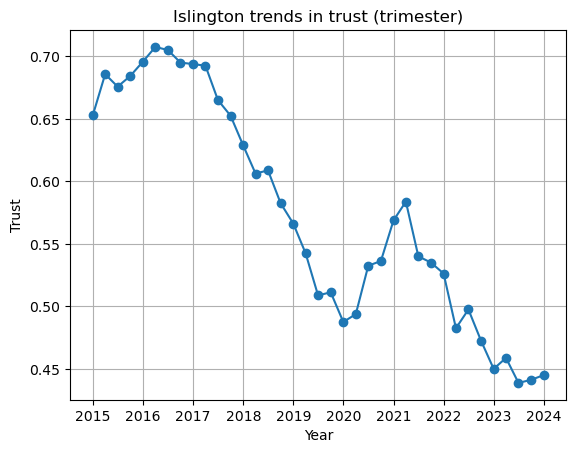

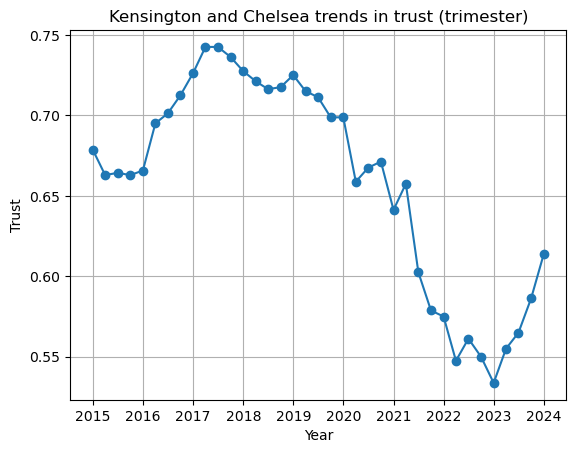

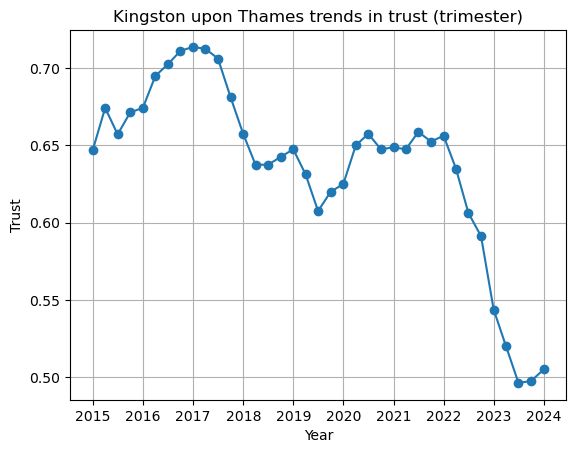

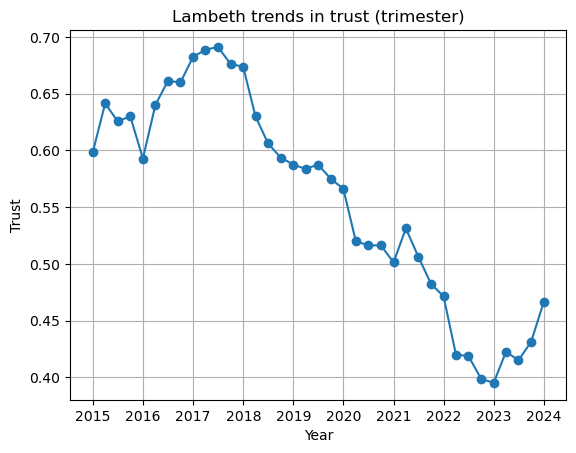

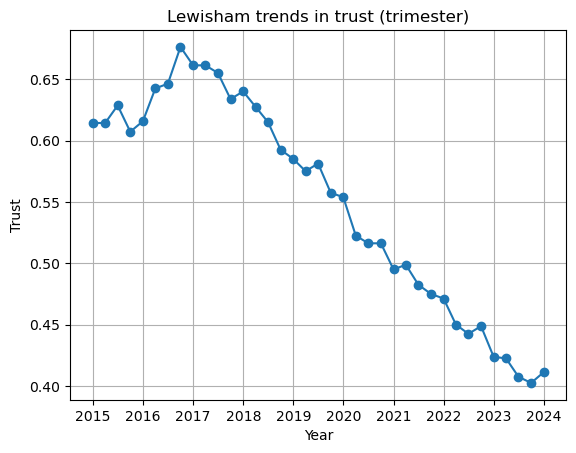

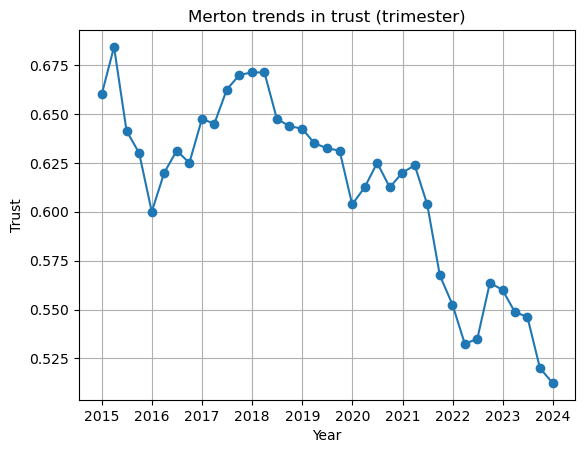

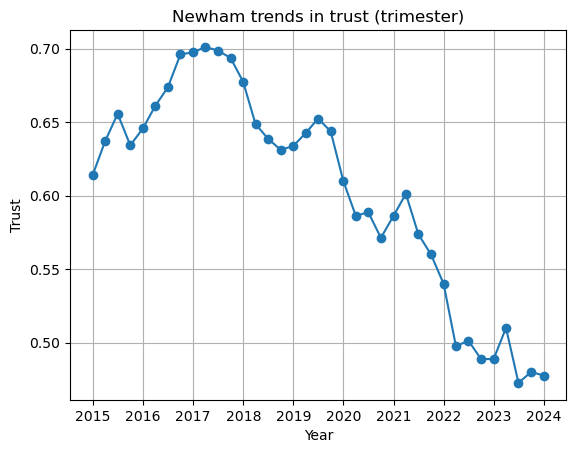

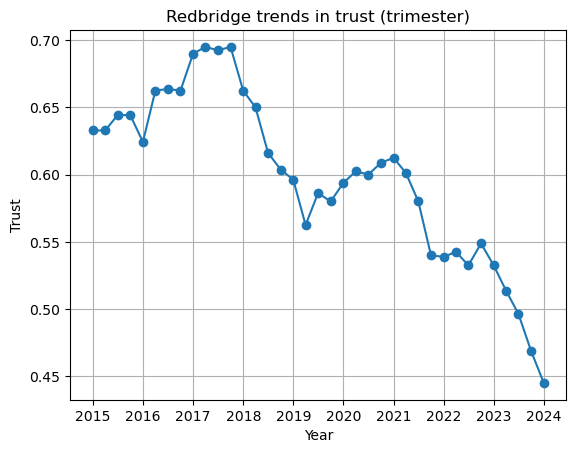

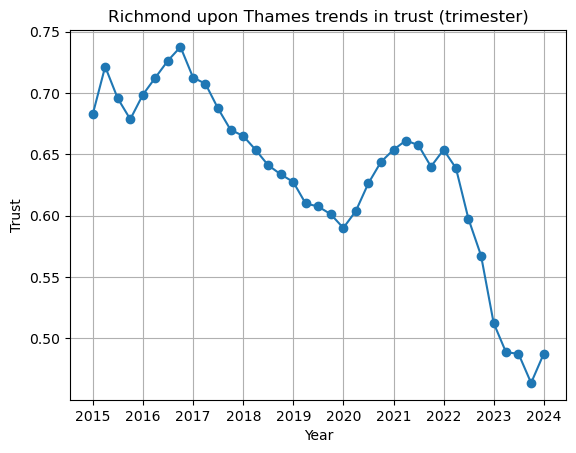

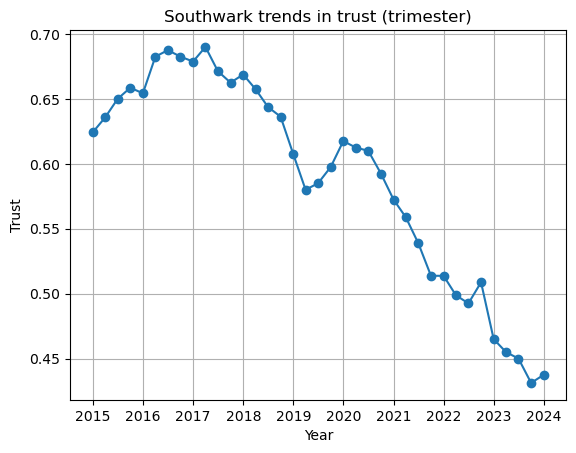

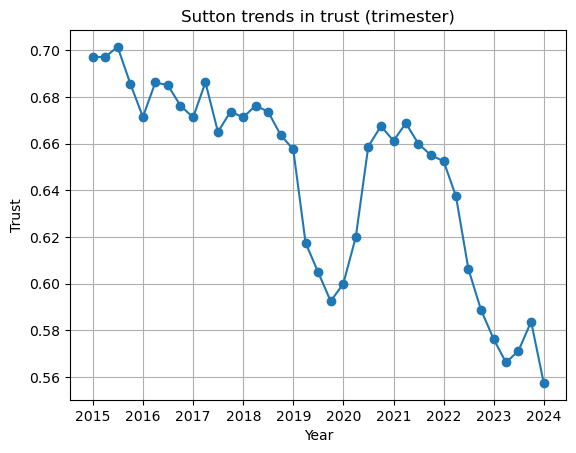

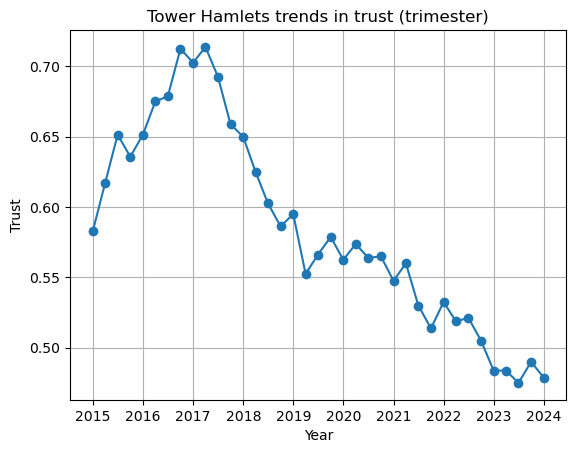

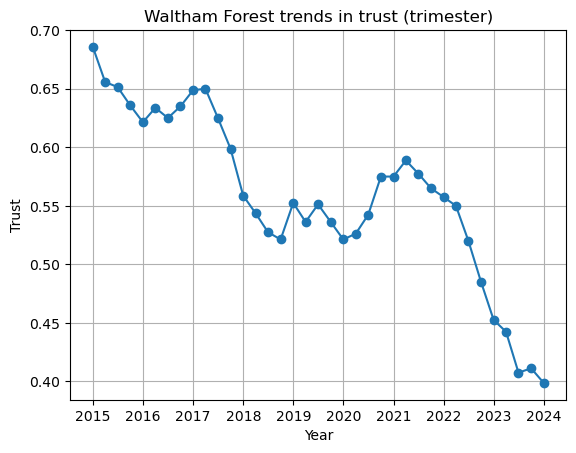

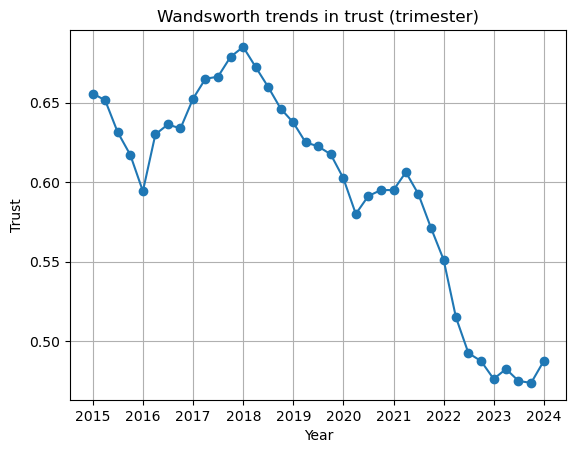

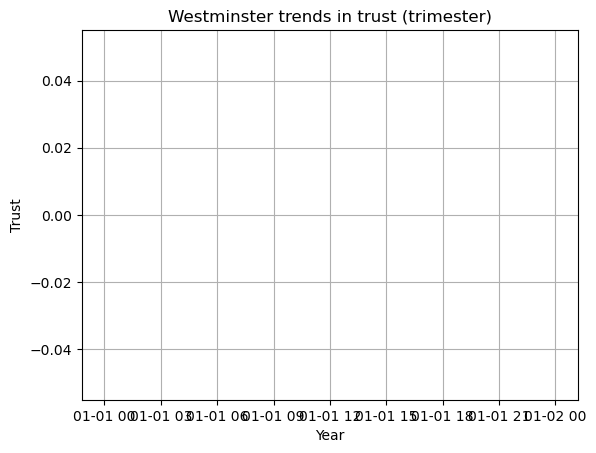

In [106]:
for B in boroughs: 
    plot_trust_bor(df_pas_date[df_pas_date['Borough'] == B], B) 

In [128]:
df_pas_date['Proportion'].autocorr()

0.8946472076184202

In [ ]:
# Heatmap of 

#### Trust Given Crime EDA

In [ ]:
# analyze stationarity before analyzing autocorrelation and the like 

In [ ]:
# Which crime does each boroughs' trust trend correlate the most with 

In [111]:
df_london['Month'] = pd.to_datetime(df_london['Month'])

In [112]:
df_london['Quarter'] = df_london['Month'].dt.quarter

In [124]:
df_crime_bor = df_london.groupby(['Borough', 'year', 'Quarter', 'Crime type']).sum()[['count']]

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\3490885740.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_crime_bor = df_london.groupby(['Borough', 'year', 'Quarter', 'Crime type']).sum()[['count']]


In [125]:
df_crime_bor.reset_index(inplace=True)

In [130]:
df_pas_date['Quarter'] = df_pas_date['Date'].dt.quarter

In [140]:
df_total_bor = df_crime_bor.groupby(['Borough', 'year', 'Quarter']).agg({'count':'sum'}) 
df_total_bor.reset_index(inplace=True) 
df_total_bor_2014 = df_total_bor[df_total_bor['year'] >= 2014]

In [148]:
df_total_bor['Y-Q'] = str(df_total_bor['year']) + '-' + str(df_total_bor['Quarter'])

In [151]:
df_total_bor

Borough  year  Quarter  count  \
0     Barking and Dagenham  2011        1   6968   
1     Barking and Dagenham  2011        2   8104   
2     Barking and Dagenham  2011        3   7472   
3     Barking and Dagenham  2011        4   6331   
4     Barking and Dagenham  2012        1   6537   
...                    ...   ...      ...    ...   
1659           Westminster  2022        4  27865   
1660           Westminster  2023        1  23584   
1661           Westminster  2023        2  24190   
1662           Westminster  2023        3  23766   
1663           Westminster  2023        4  29676   

                                                    Y-Q  
0     0       2011\n1       2011\n2       2011\n3   ...  
1     0       2011\n1       2011\n2       2011\n3   ...  
2     0       2011\n1       2011\n2       2011\n3   ...  
3     0       2011\n1       2011\n2       2011\n3   ...  
4     0       2011\n1       2011\n2       2011\n3   ...  
...                                                 ...  
1659  0       2011\n1       2011\n2       2011\n3   ...  
1660  0       2011\n1       2011\n2       2011\n3   ...  
1661  0       2011\n1       2011\n2       2011\n3   ...  
1662  0       2011\n1       2011\n2       2011\n3   ...  
1663  0       2011\n1       2011\n2       2011\n3   ...  

[1664 rows x 5 columns]

In [187]:
def plot_trust_crime_bor(group1, group2, borough, i): 

    #plt.figure()
    ax[i,0].plot(group1['Date'], group1['Proportion'], marker='o')   
    ax[i,1].plot(group2['Date'], group2['count'], marker='x')
    # Add labels and title
    #plt.xlabel('Year')
    #plt.ylabel('Trust')
    #plt.title('{} trends in trust'.format(borough))
    #plt.legend() 
    
    # Show the plot
    #plt.grid(True)
    #plt.show() 

In [188]:
df_total_bor_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1280 entries, 12 to 1663
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Borough  1280 non-null   object        
 1   year     1280 non-null   int64         
 2   Quarter  1280 non-null   int64         
 3   count    1280 non-null   int64         
 4   Date     1280 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 60.0+ KB


In [189]:
def last_date_of_quarter(year, quarter): 
    year = int(year) 
    if quarter == 1.0:
        return pd.Timestamp(year, 3, 31)
    elif quarter == 2.0:
        return pd.Timestamp(year, 6, 30)
    elif quarter == 3.0:
        return pd.Timestamp(year, 9, 30)
    elif quarter == 4.0:
        return pd.Timestamp(year, 12, 31)

df_total_bor_2014['Date'] = df_total_bor_2014.apply(lambda row: last_date_of_quarter(row['year'], row['Quarter']), axis=1)

C:\Users\diego\AppData\Local\Temp\ipykernel_25432\1544160581.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_total_bor_2014['Date'] = df_total_bor_2014.apply(lambda row: last_date_of_quarter(row['year'], row['Quarter']), axis=1)


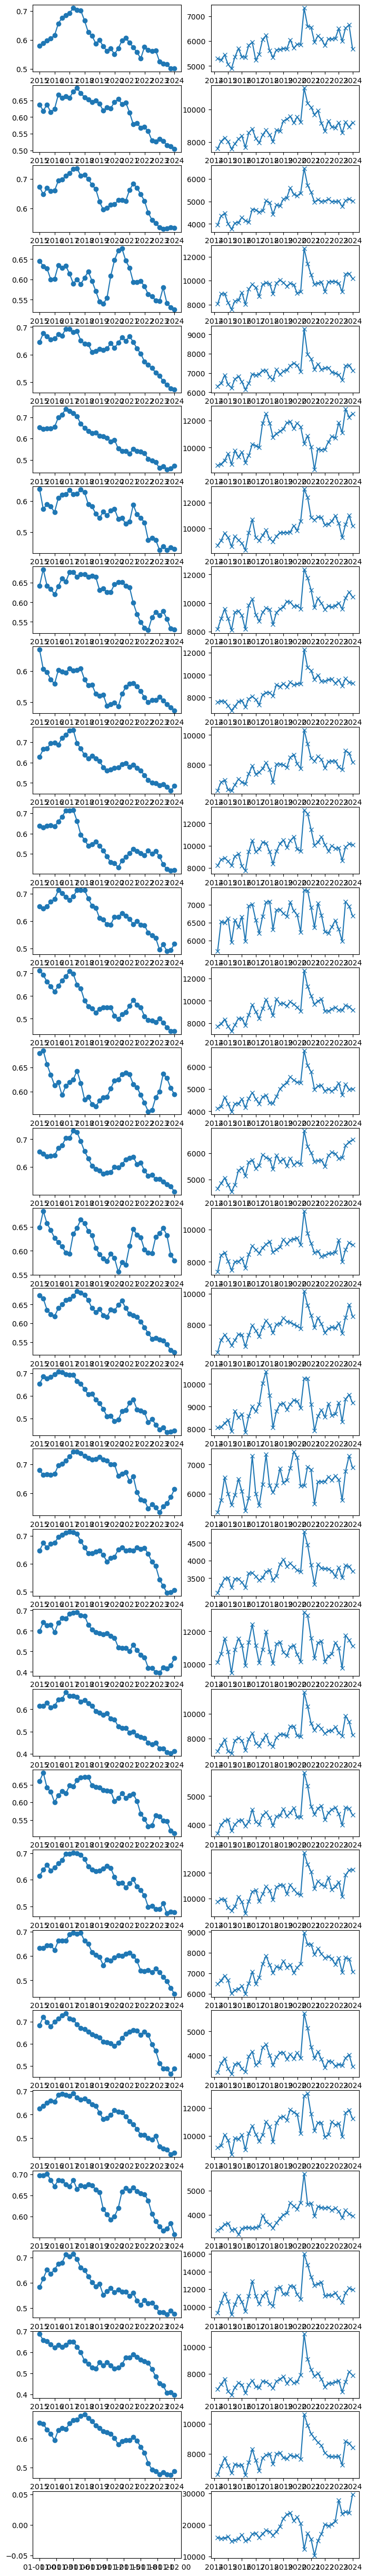

In [193]:
fig, ax = plt.subplots(nrows=32, ncols=2, figsize=(8,63))

count=0    
for B in boroughs: 
    plot_trust_crime_bor(df_pas_date[df_pas_date['Borough'] == B], df_total_bor_2014[df_total_bor_2014['Borough']==B], B, count) 
    count+=1

In [173]:
len(boroughs)

32